### Importing Libraries

this notebook is a modified version of https://www.kaggle.com/code/soomol/air-bnb-price-prediction

In the end a processed dataset ready to use for this project is generated under the same folder as dataset

In [68]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# change to your local path to project below
project_path = '/home/jorge/Insync/jorgitoje@gmail.com/OneDrive/Documentos/JORGE/EDUCATION/MASTER_DATASCIENCE/Semester1/AdvancedStatistics/GroupProject/KDS_Statistics_GroupProject'

### Reading data and creating dataframe

In [69]:
dataset_path = os.path.join(project_path, 'datasets/Airbnb_price/data_Airbnb.csv')
df = pd.read_csv(dataset_path)

### Displaying sample data

In [70]:
df.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed            moderate          True  ...  40.808110  -73.943756   
3  Real Bed            flexible          True  ...  37.772004 -122.431619   
4  Real Bed            moderate          True  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   
3                 0                  NaN   
4                 4                 40.0   

                                       thumbnail_url  zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...    11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...    10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...    10027      1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0      2.0   2.0  
4                                                NaN    20009      0.0   1.0  

[5 rows x 29 columns]

### Shape of data

In [71]:
df.shape

(74111, 29)

In [72]:
print("The dataset has \nrows :- {}\ncolumns :- {}".format(df.shape[0],df.shape[1]))

The dataset has 
rows :- 74111
columns :- 29


### Columns of dataset

In [73]:
dataset_columns = list(df.columns)
dataset_columns

['id',
 'log_price',
 'property_type',
 'room_type',
 'amenities',
 'accommodates',
 'bathrooms',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'latitude',
 'longitude',
 'name',
 'neighbourhood',
 'number_of_reviews',
 'review_scores_rating',
 'thumbnail_url',
 'zipcode',
 'bedrooms',
 'beds']

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

### Datatypes of columns

In [75]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

### Finding missing values in dataset

In [76]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

### MISSING VALUES COUNT OF COLUMN AND THEIR DATATYPES

In [77]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print("========================================")
        print("{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))

bathrooms :- 200,  dtypes : float64
first_review :- 15864,  dtypes : object
host_has_profile_pic :- 188,  dtypes : object
host_identity_verified :- 188,  dtypes : object
host_response_rate :- 18299,  dtypes : object
host_since :- 188,  dtypes : object
last_review :- 15827,  dtypes : object
neighbourhood :- 6872,  dtypes : object
review_scores_rating :- 16722,  dtypes : float64
thumbnail_url :- 8216,  dtypes : object
zipcode :- 966,  dtypes : object
bedrooms :- 91,  dtypes : float64
beds :- 131,  dtypes : float64


In [78]:
# the last_review column in the dataset is a datetime field and it contains 15827 missing values

#### Converting datatype of last_review column, first_review and host_since to datetime

In [79]:
df["last_review"] = pd.to_datetime(df["last_review"])
df["first_review"] = pd.to_datetime(df["first_review"])
df["host_since"] = pd.to_datetime(df["host_since"])

In [80]:
df.last_review

0       2016-07-18
1       2017-09-23
2       2017-09-14
3              NaT
4       2017-01-22
           ...    
74106          NaT
74107   2017-04-15
74108   2017-09-10
74109          NaT
74110   2017-04-30
Name: last_review, Length: 74111, dtype: datetime64[ns]

In [81]:
df.first_review

0       2016-06-18
1       2017-08-05
2       2017-04-30
3              NaT
4       2015-05-12
           ...    
74106          NaT
74107   2016-08-15
74108   2015-01-03
74109          NaT
74110   2013-09-05
Name: first_review, Length: 74111, dtype: datetime64[ns]

In [82]:
df.host_since

0       2012-03-26
1       2017-06-19
2       2016-10-25
3       2015-04-19
4       2015-03-01
           ...    
74106   2013-03-24
74107   2016-05-03
74108   2012-01-05
74109   2017-09-17
74110   2012-11-26
Name: host_since, Length: 74111, dtype: datetime64[ns]

### Replacing missing values in last_review column and first_review column

In [83]:
df.last_review.fillna(method="ffill",inplace=True)

In [84]:
df.first_review.fillna(method="ffill",inplace=True)

In [85]:
df.host_since.fillna(method="ffill",inplace=True)

###### In ffill method the previous value in the column gets copied in the missing value place

In [86]:
df.last_review

0       2016-07-18
1       2017-09-23
2       2017-09-14
3       2017-09-14
4       2017-01-22
           ...    
74106   2017-02-19
74107   2017-04-15
74108   2017-09-10
74109   2017-09-10
74110   2017-04-30
Name: last_review, Length: 74111, dtype: datetime64[ns]

In [87]:
df.first_review

0       2016-06-18
1       2017-08-05
2       2017-04-30
3       2017-04-30
4       2015-05-12
           ...    
74106   2016-03-25
74107   2016-08-15
74108   2015-01-03
74109   2015-01-03
74110   2013-09-05
Name: first_review, Length: 74111, dtype: datetime64[ns]

In [88]:
print("Missing values in datetime type columns ")
print("last_review :- ",df.last_review.isnull().sum())
print("first review :- ",df.first_review.isnull().sum())
print("host_since :- ",df.host_since.isnull().sum())

Missing values in datetime type columns 
last_review :-  0
first review :-  0
host_since :-  0


/tmp/ipykernel_46284/3563605442.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

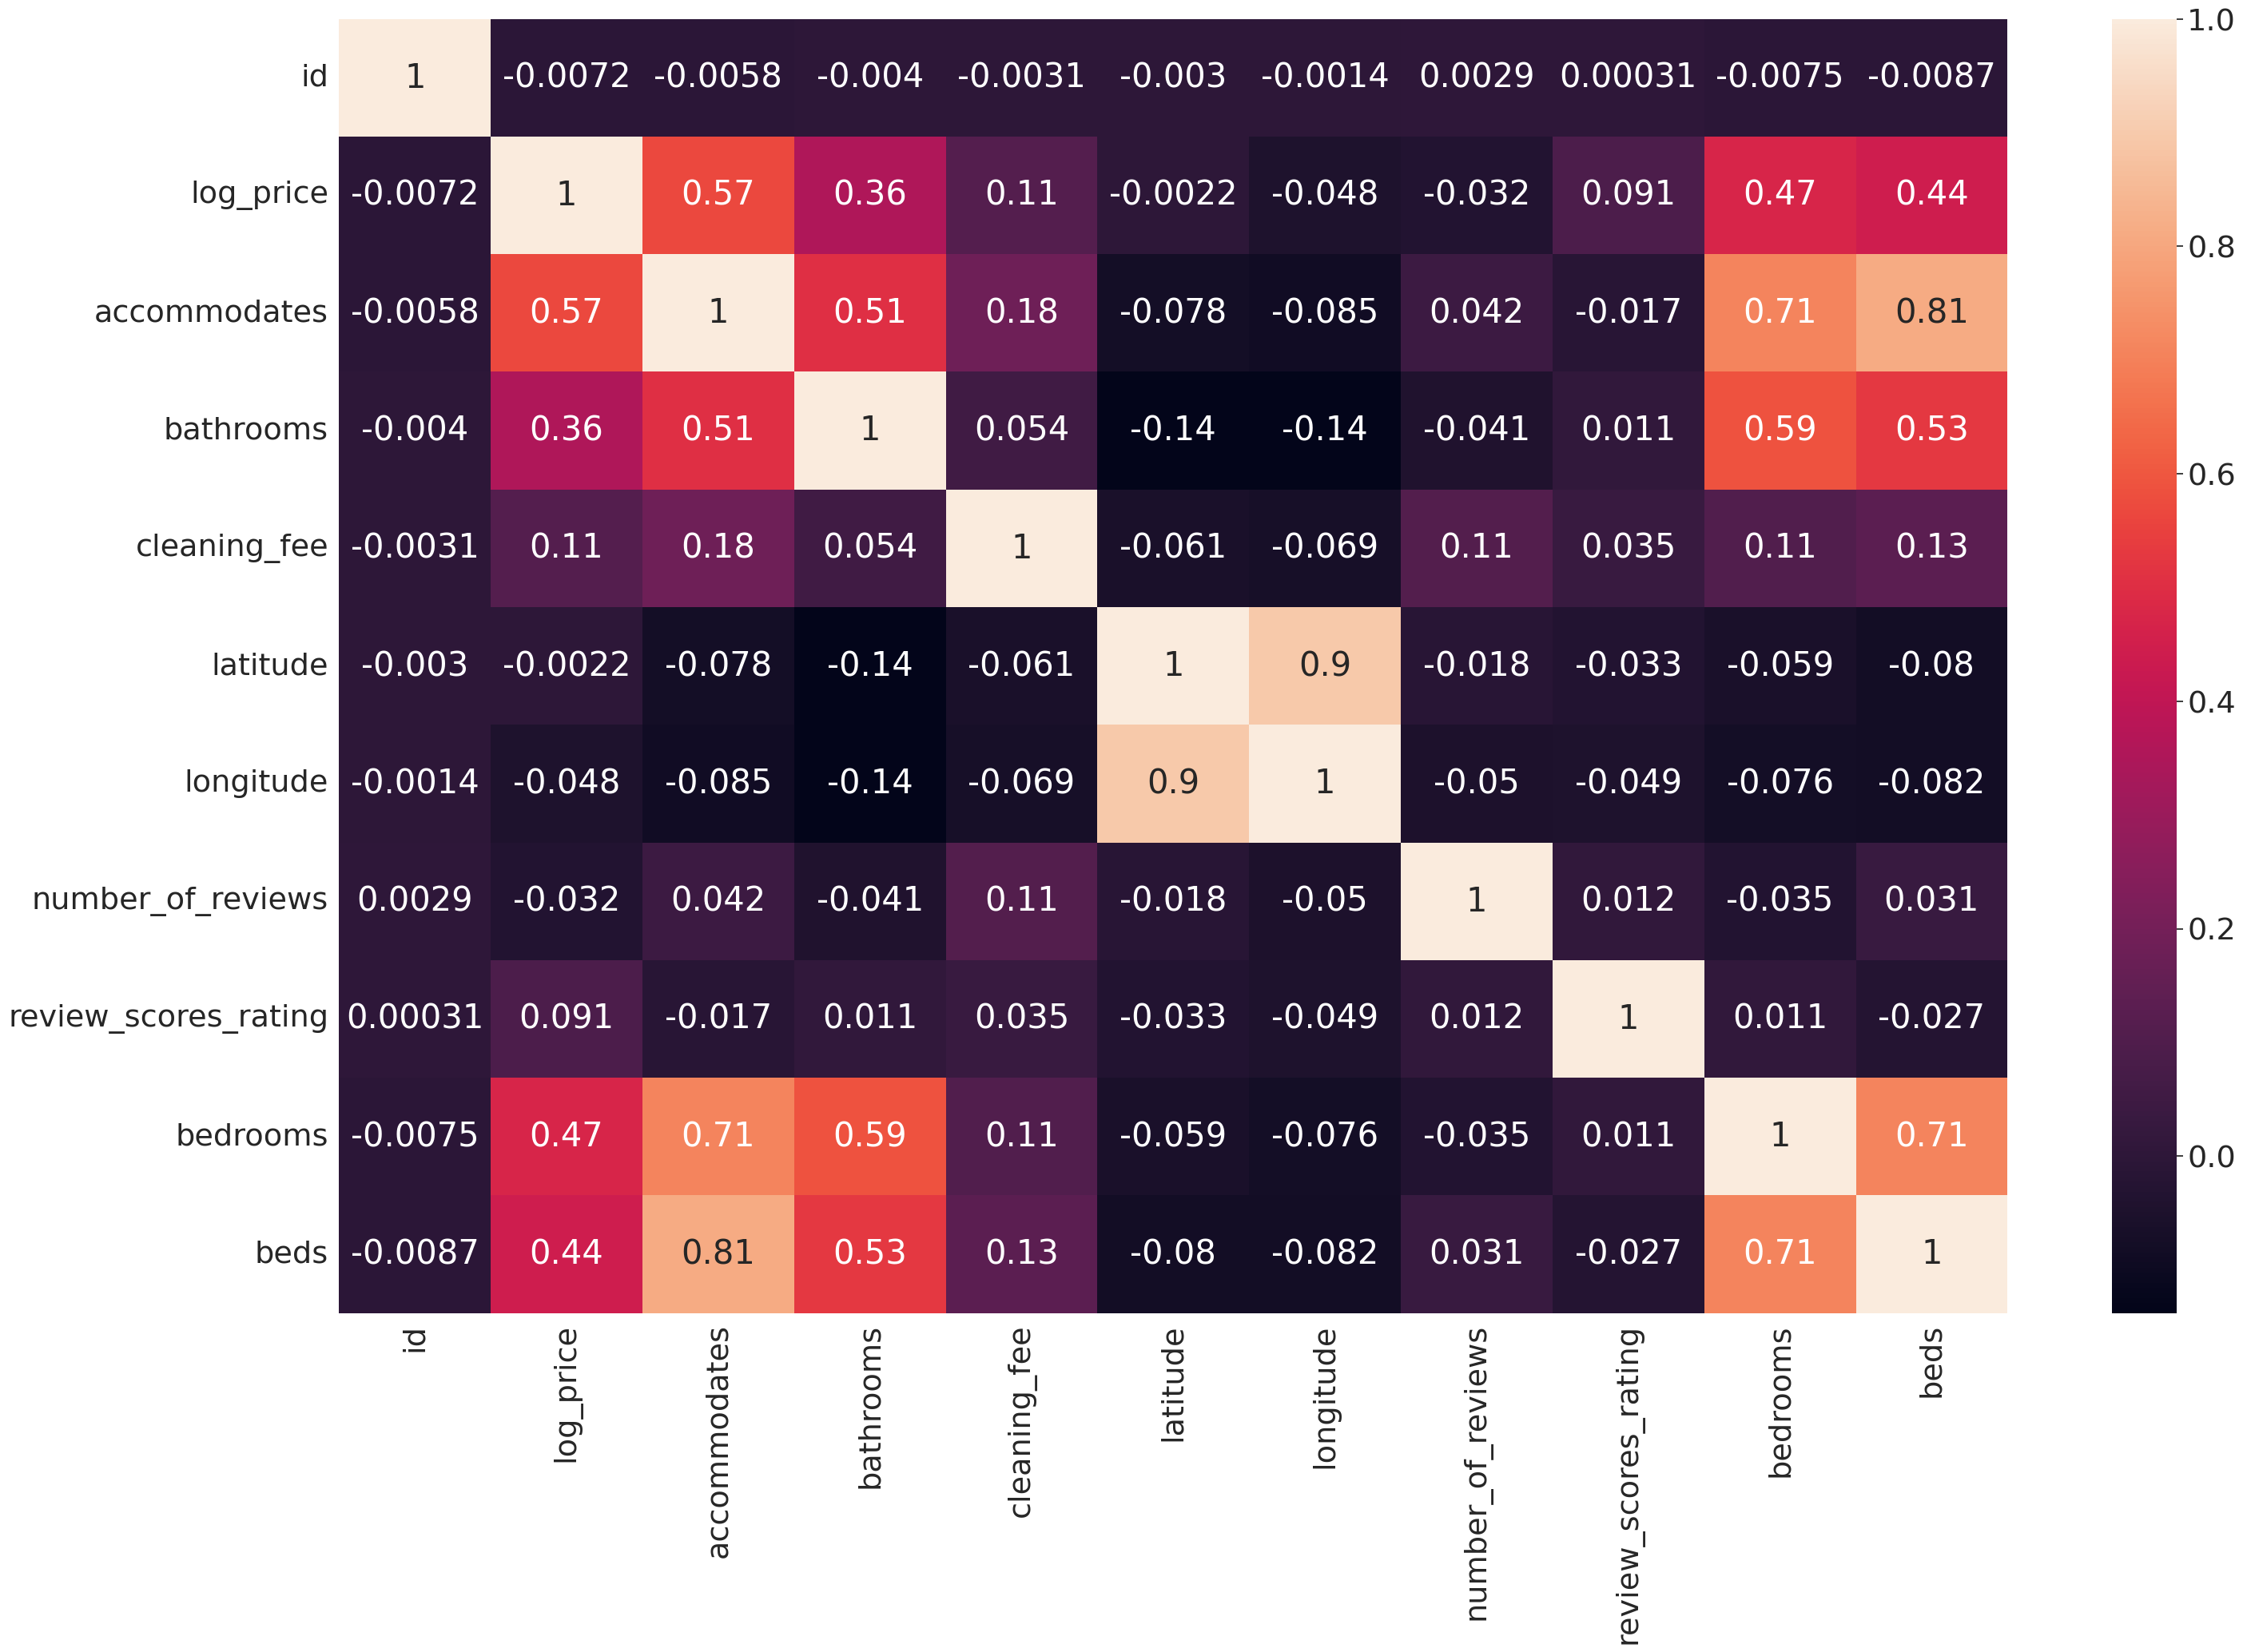

In [89]:
sns.set(font_scale=2.5)
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)

### Handling Missing Values of columns whose datatype is float

##### 1) Bathrooms

In [90]:
df.bathrooms.mean()

1.235262680791763

In [91]:
df.bathrooms.unique()

array([1. , 1.5, 2. , nan, 2.5, 3. , 0.5, 4.5, 5. , 0. , 4. , 3.5, 5.5,
       7.5, 6. , 8. , 7. , 6.5])

In [92]:
# the bathrooms column contains values in the multiples of 0.5 
# Hence replacing the missing values in this column by the roundoff value of mean value of this column
# Since the mean of this column 1.2352 is not a multiple of 0.5

In [93]:
df["bathrooms"] = df['bathrooms'].fillna(round(df["bathrooms"].mean()))

In [94]:
# All the missing values of bathroom column are handled
df.bathrooms.isnull().sum()

0

##### 2) Review_Scores_Rating

In [95]:
print("Mean:- ",df.review_scores_rating.mean())
print("Min :- ",df.review_scores_rating.min())
print("Max :- ",df.review_scores_rating.max())

Mean:-  94.06736482601195
Min :-  20.0
Max :-  100.0


In [96]:
df[["number_of_reviews","review_scores_rating"]][df.number_of_reviews == 0]

number_of_reviews  review_scores_rating
3                      0                   NaN
12                     0                   NaN
15                     0                   NaN
24                     0                   NaN
31                     0                   NaN
...                  ...                   ...
74083                  0                   NaN
74089                  0                   NaN
74095                  0                   NaN
74106                  0                   NaN
74109                  0                   NaN

[15819 rows x 2 columns]

In [97]:
# the above table shows that the missing values in review_scores_rating is NaN which has 0 number_of_reviews
# Hence replacing this missing values with 0

In [98]:
# Replacing the missing values in the review_scores_rating with 0
df["review_scores_rating"] = df["review_scores_rating"].fillna(0)

In [99]:
# All the missing values of review_scores_rating column are handled
df.review_scores_rating.isnull().sum()

0

##### 3) Bedrooms

In [100]:
df.bedrooms.mean()

1.265793028911105

In [101]:
df.bedrooms.unique()

array([ 1.,  3.,  2.,  0.,  4., nan,  5.,  6.,  7.,  8.,  9., 10.])

In [102]:
df.bedrooms.describe()

count    74020.000000
mean         1.265793
std          0.852143
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: bedrooms, dtype: float64

In [103]:
# Bedrooms column contain only integer values and mean is 1.26
# Replacing missing values with 1

In [104]:
df["bedrooms"] = df["bedrooms"].fillna(1.0)

In [105]:
# All the missing values of bedrooms column are handled
df.bedrooms.isnull().sum()

0

###### 4) Beds

In [106]:
df.beds.mean()

1.710867802108678

In [107]:
df.beds.unique()

array([ 1.,  3.,  2.,  7.,  4.,  6.,  5., nan, 10.,  8., 16.,  9., 13.,
       12., 11., 14., 15.,  0., 18.])

In [108]:
df.beds.describe()

count    73980.000000
mean         1.710868
std          1.254142
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         18.000000
Name: beds, dtype: float64

In [109]:
# Beds column also contain only integer values and mean is 1.71
# Replacing missing values with 2

In [110]:
df["beds"] = df["beds"].fillna(2.0)

In [111]:
# All the missing values of beds column are handled
df.beds.isnull().sum()

0

In [112]:
df.host_has_profile_pic

0        t
1        t
2        t
3        t
4        t
        ..
74106    t
74107    t
74108    t
74109    t
74110    t
Name: host_has_profile_pic, Length: 74111, dtype: object

In [113]:
df.host_identity_verified

0        t
1        f
2        t
3        t
4        t
        ..
74106    t
74107    f
74108    t
74109    f
74110    t
Name: host_identity_verified, Length: 74111, dtype: object

#### the columns host_has_profile_pic and host_identity_verified has boolean values true and false

In [114]:
# replacing t and f in these columns with 1 and 0 respectively and changing datatype to bool

In [115]:
df.replace(to_replace = "t", value = 1,inplace=True) 
df.replace(to_replace = "f", value = 0,inplace=True) 

In [116]:
print(df.host_has_profile_pic.dtypes)
print(df.host_identity_verified.dtypes)

float64
float64


In [117]:
df["host_has_profile_pic"] = df["host_has_profile_pic"].astype("bool")
df["host_identity_verified"] = df["host_identity_verified"].astype("bool")

In [118]:
# changed the datatype to bool of these two columns

In [119]:
# Dropping host_response_rate and zipcode and thumbnail_url column ---> bcoz not relevant on determining the log_price

In [120]:
df.drop(["host_response_rate"],axis=1,inplace=True)

In [121]:
df.drop(["zipcode"],axis=1,inplace=True)

In [122]:
df.drop(["thumbnail_url"],axis=1,inplace=True)

In [123]:
df.dtypes

id                                 int64
log_price                        float64
property_type                     object
room_type                         object
amenities                         object
accommodates                       int64
bathrooms                        float64
bed_type                          object
cancellation_policy               object
cleaning_fee                        bool
city                              object
description                       object
first_review              datetime64[ns]
host_has_profile_pic                bool
host_identity_verified              bool
host_since                datetime64[ns]
instant_bookable                   int64
last_review               datetime64[ns]
latitude                         float64
longitude                        float64
name                              object
neighbourhood                     object
number_of_reviews                  int64
review_scores_rating             float64
bedrooms        

### City-wise distibution of Hotels

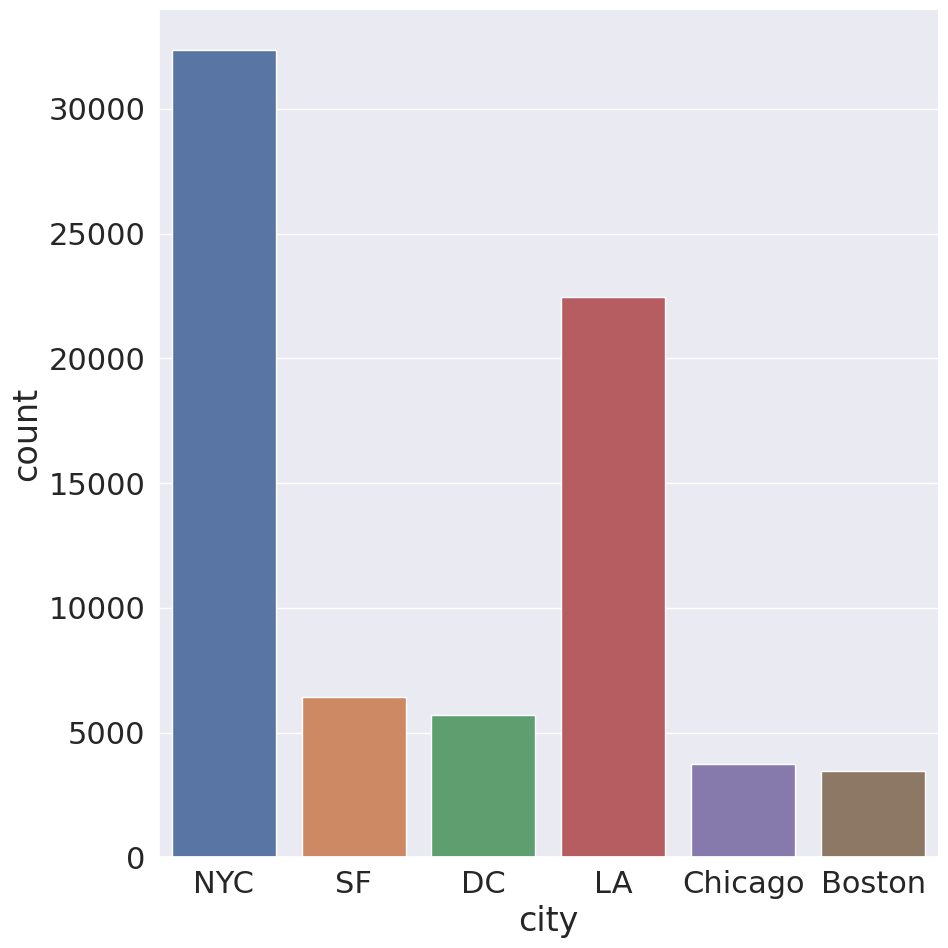

In [124]:
sns.set(font_scale=2)
sns.catplot(x = "city", kind="count", data=df,height=10);

###  Percentage wise distribution of hotels in different cities

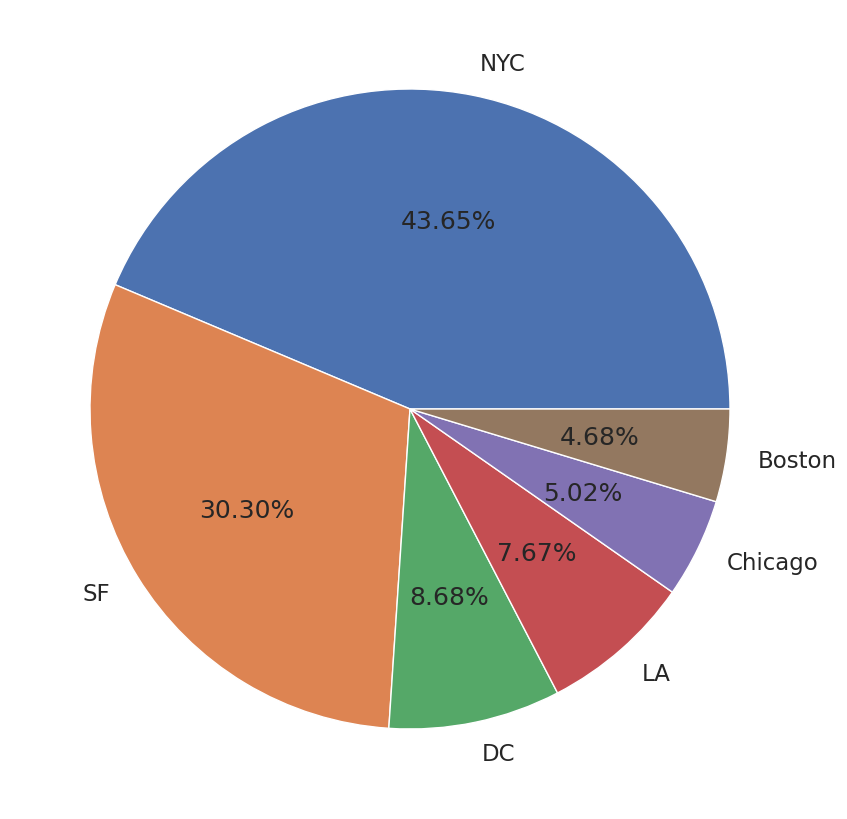

In [125]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df.city.unique())
students =list(df.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

### Top-15 Popular Nighbourhood

<BarContainer object of 15 artists>

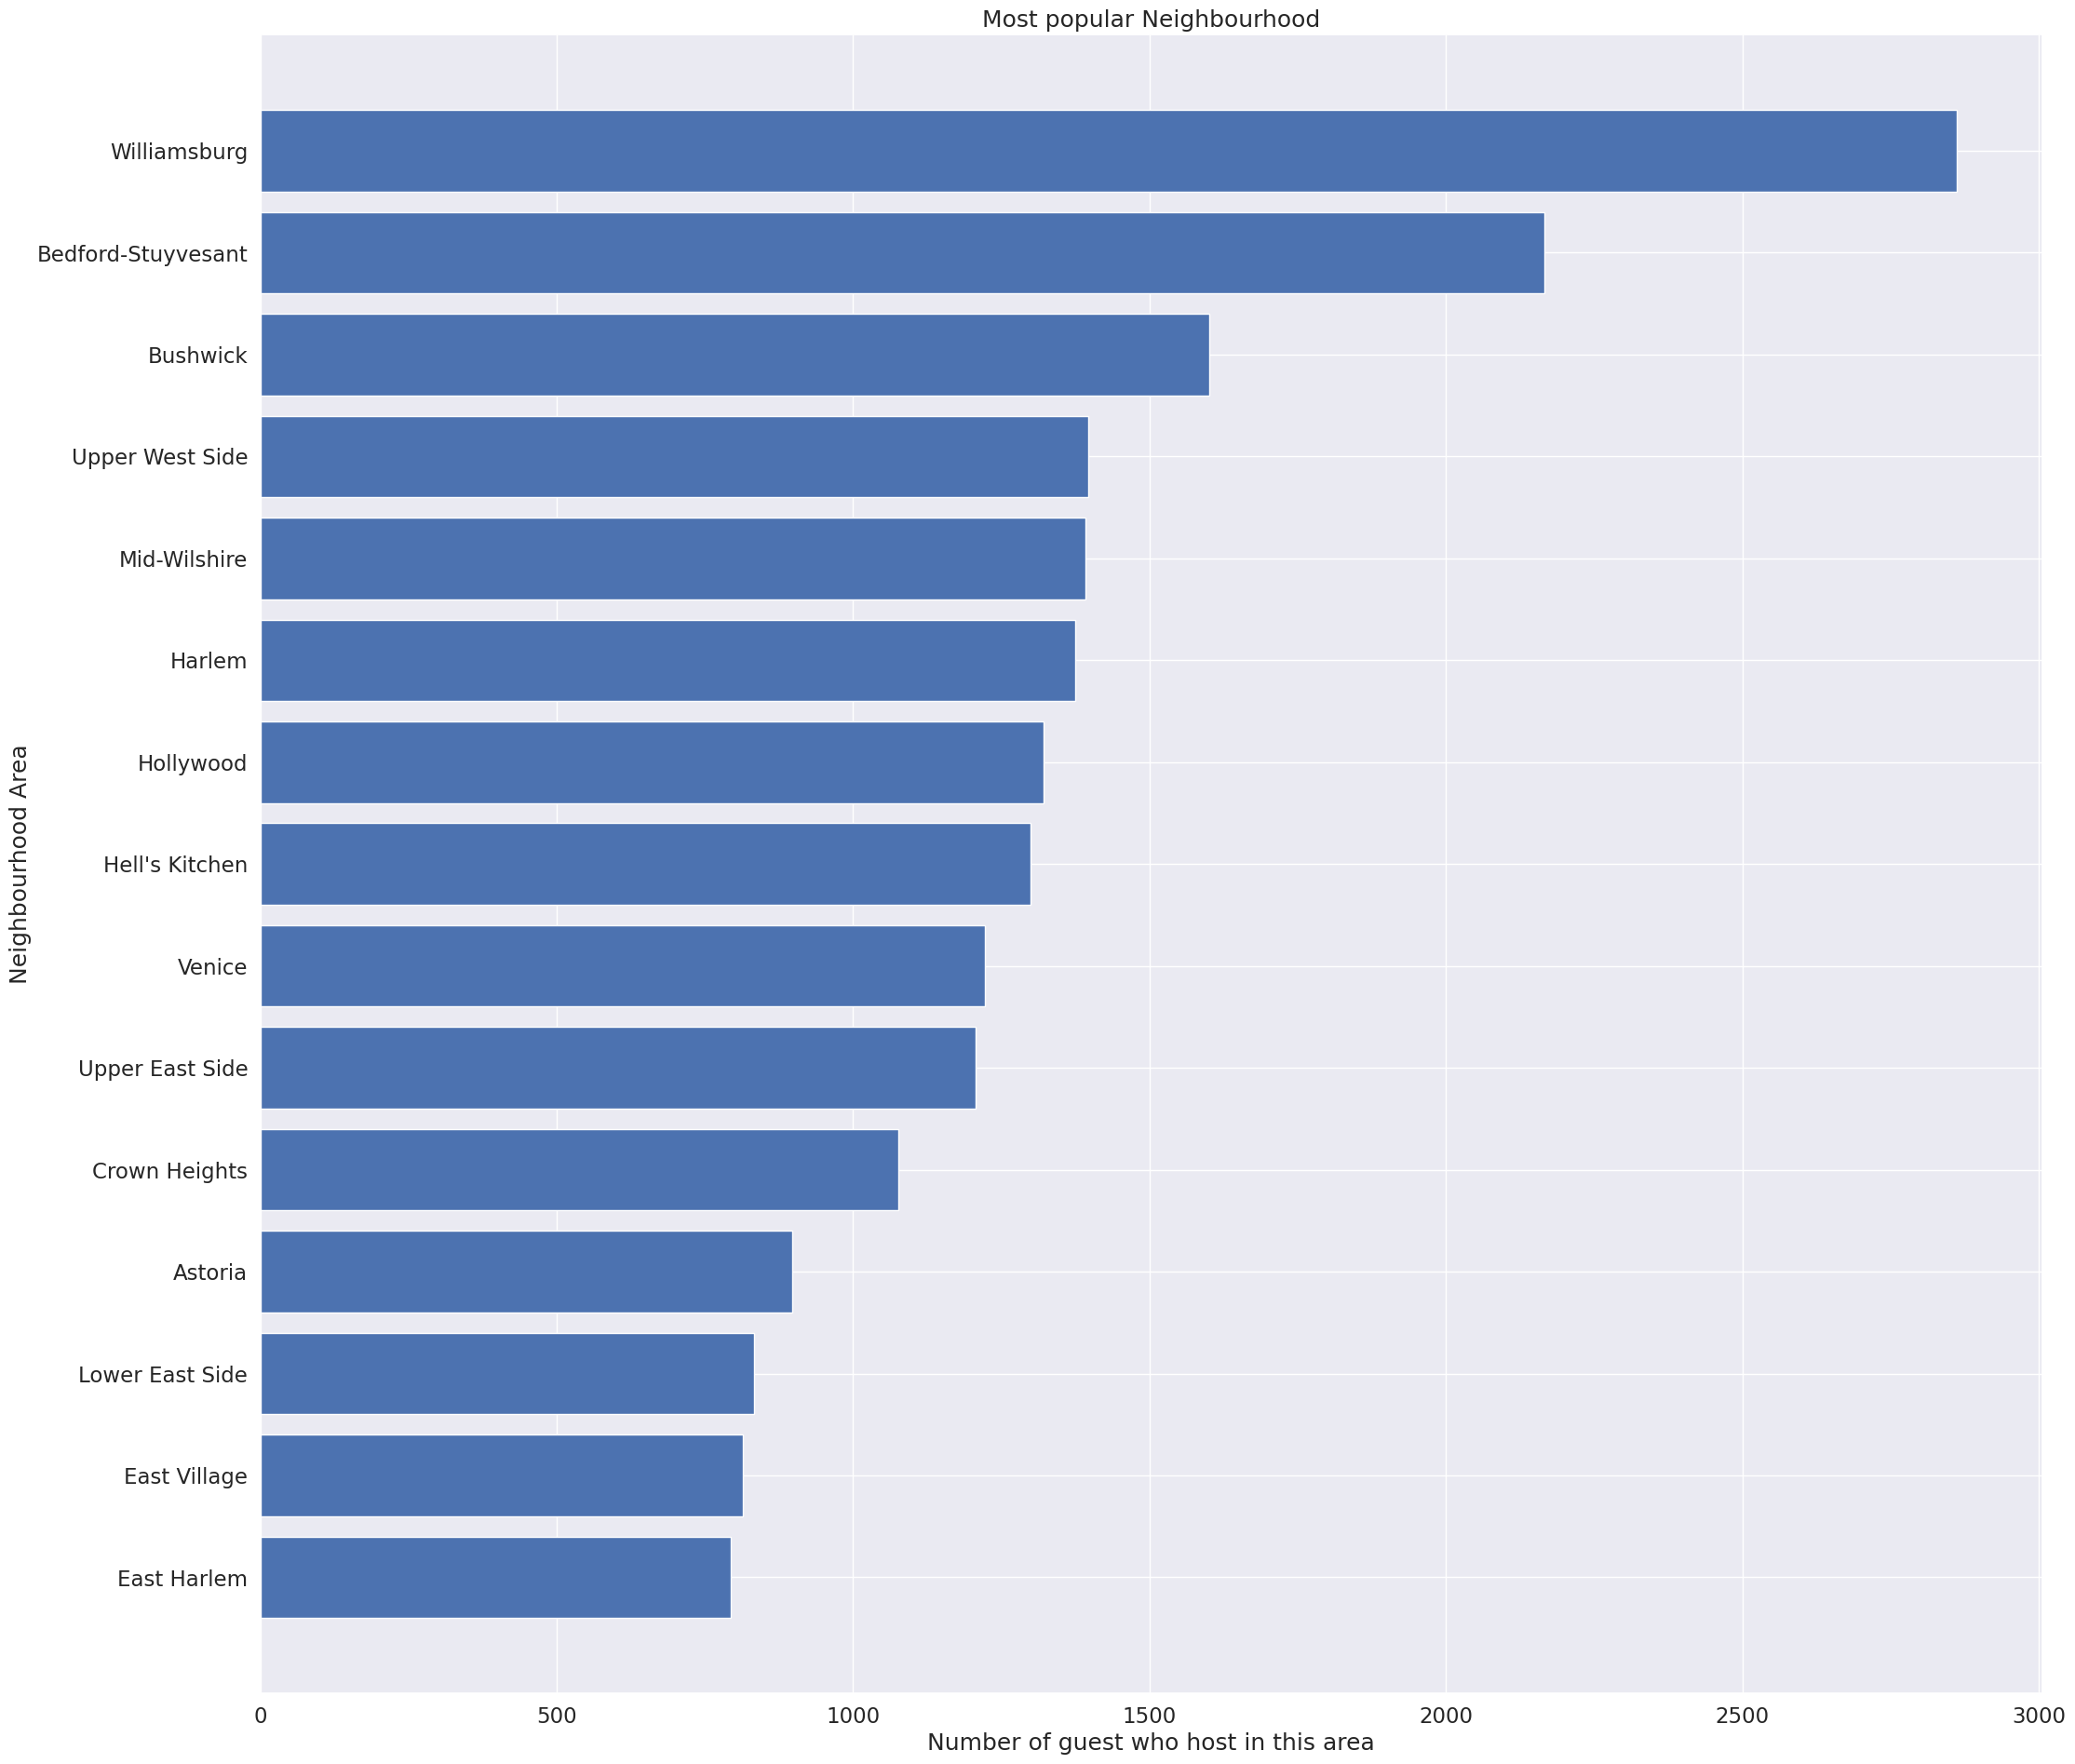

In [126]:
data = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)

In [127]:
# Function to plot catplot graphs
def plot_catplot(h,v,he):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he)

In [128]:
# Function to plot catplot graphs
def plot_piechart(h):
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    langs = list(df[h].unique())
    students =list(df[h].value_counts())
    ax.pie(students, labels = langs,autopct='%1.2f%%')
    plt.show()

### Room_type count bar graph

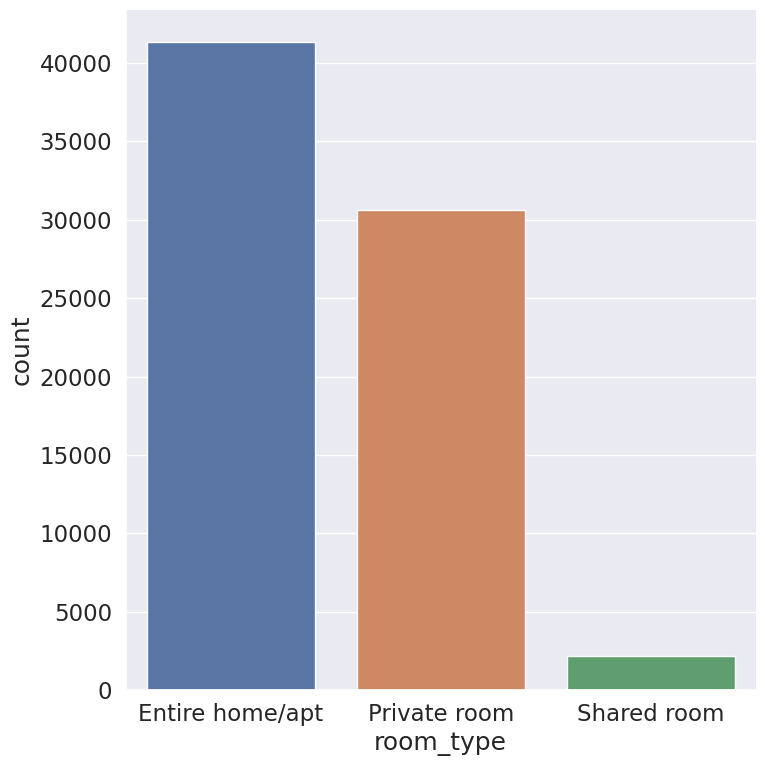

In [129]:
plot_catplot("room_type","count",8)

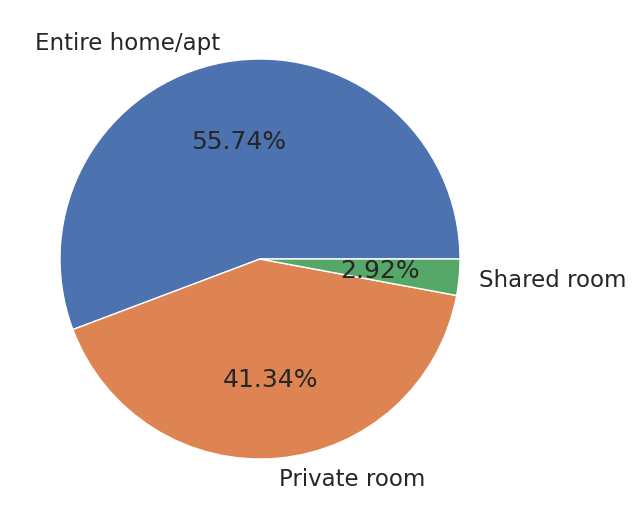

In [130]:
plot_piechart("room_type")

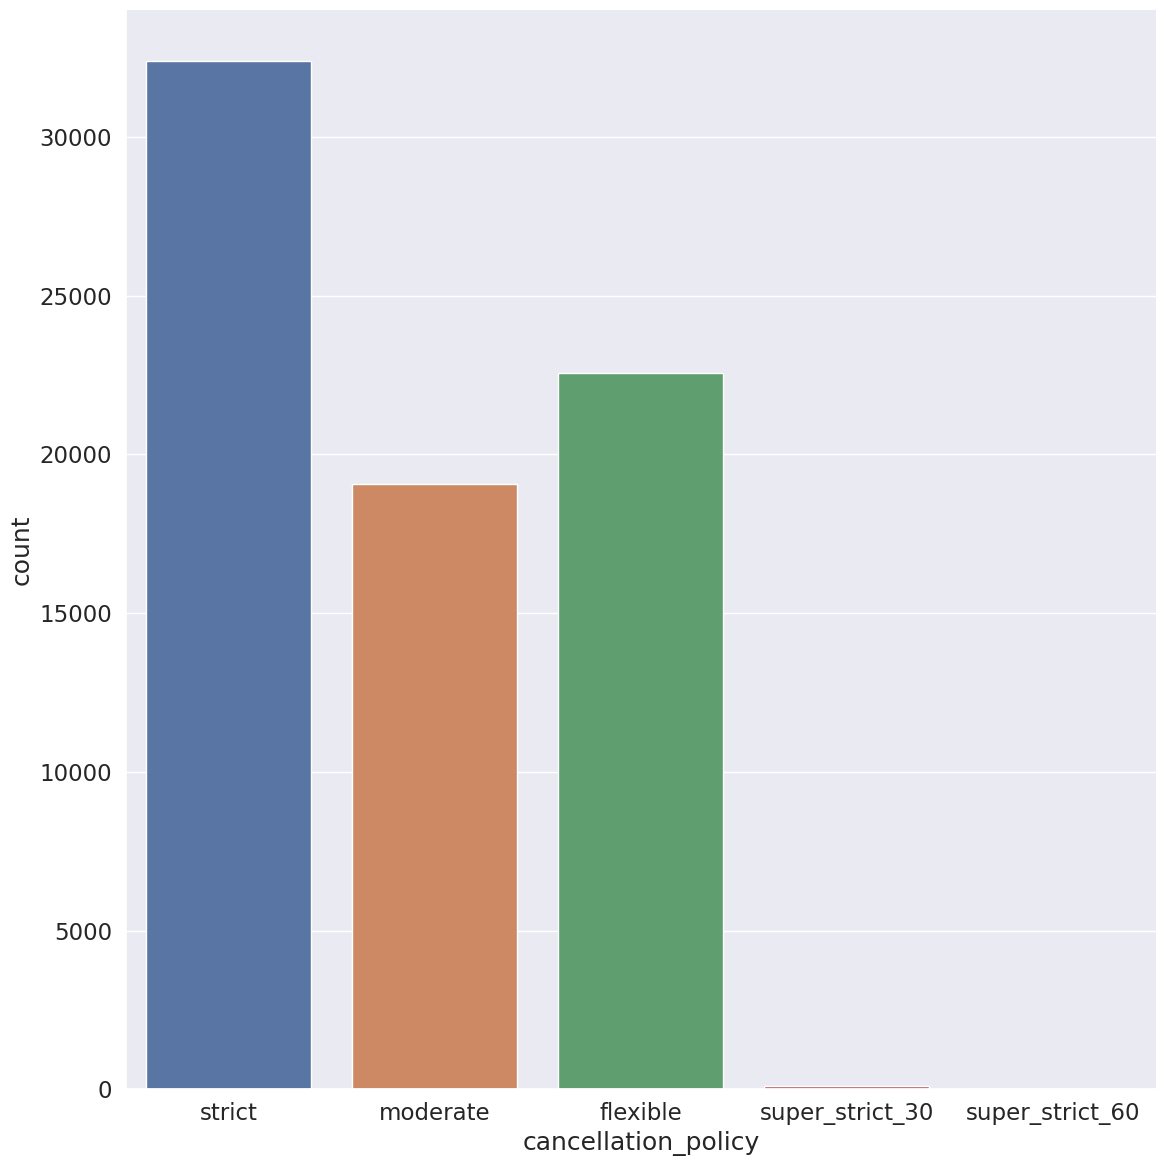

In [131]:
plot_catplot("cancellation_policy","count",12)

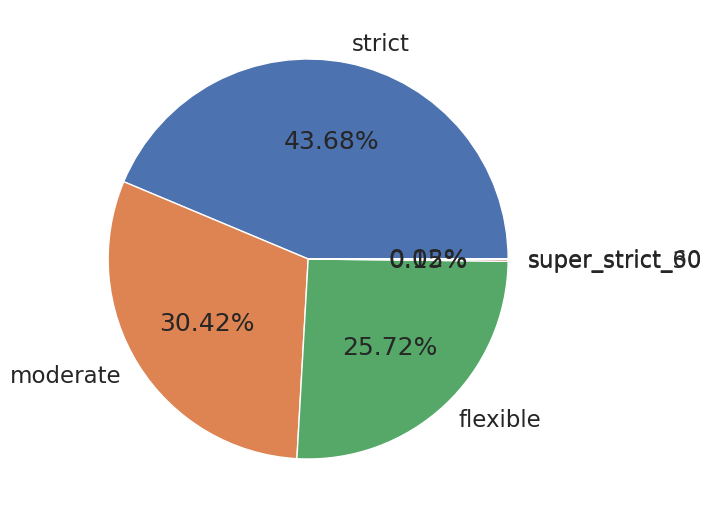

In [132]:
plot_piechart("cancellation_policy")

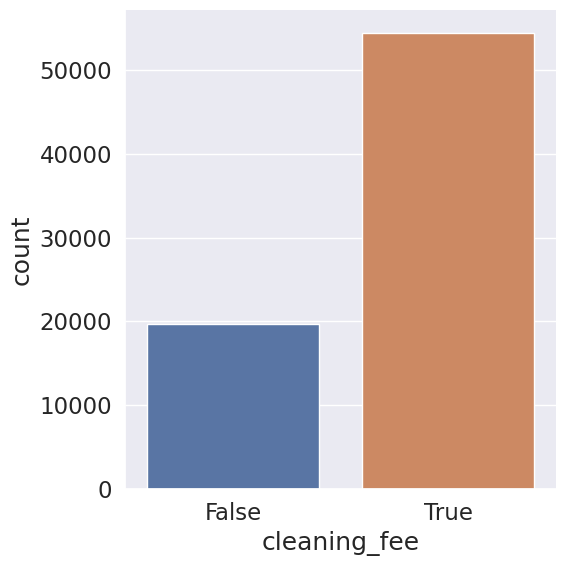

In [133]:
plot_catplot("cleaning_fee","count",6)

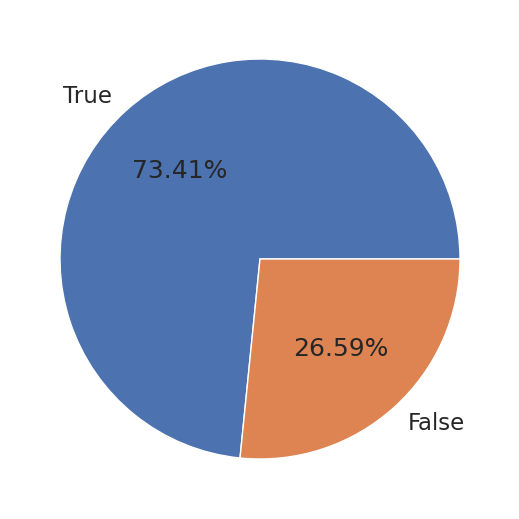

In [134]:
plot_piechart("cleaning_fee")

### Violin Plots

In [135]:
def plot_violinplot(h,v):
    plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

### Violin Plot for distribution of prices in different cities

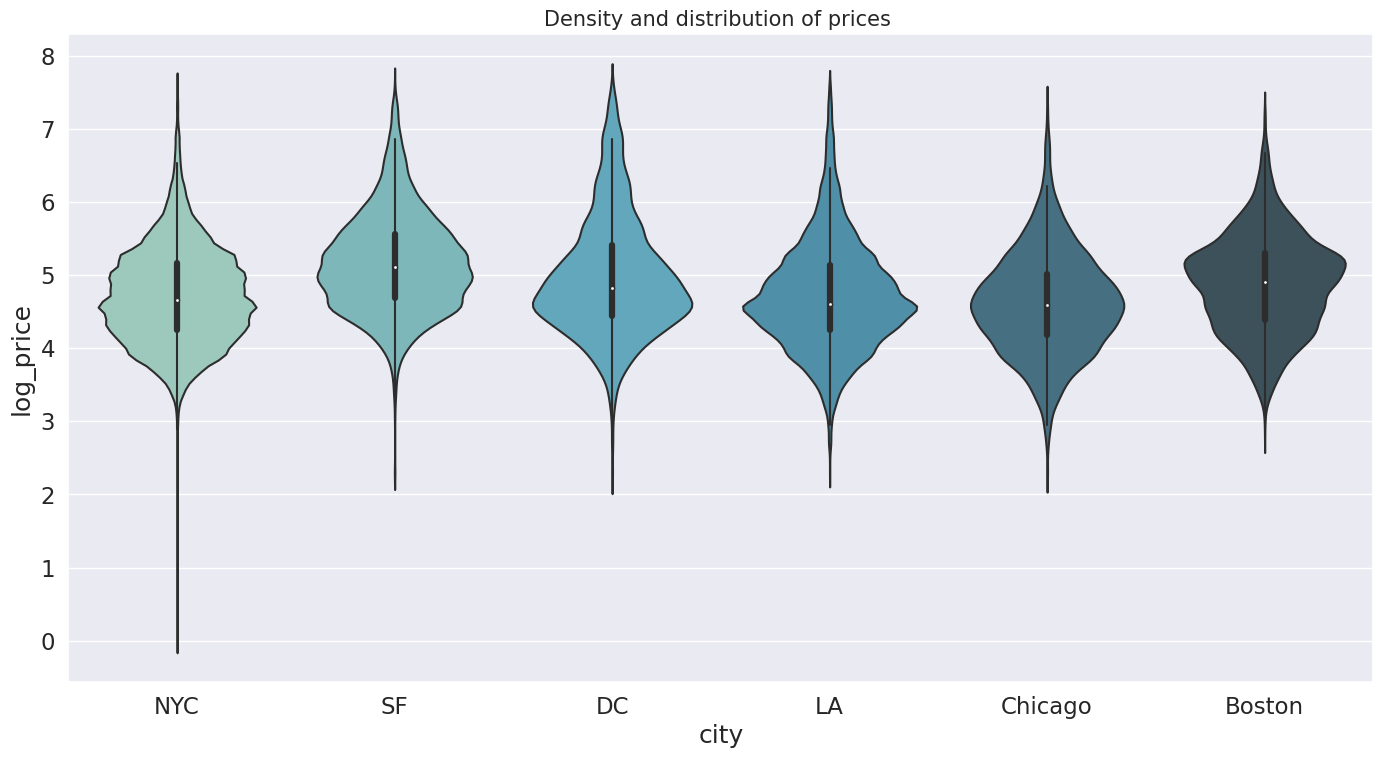

In [136]:
plot_violinplot("city","log_price")

### Violin Plot for distribution of prices in different room_types

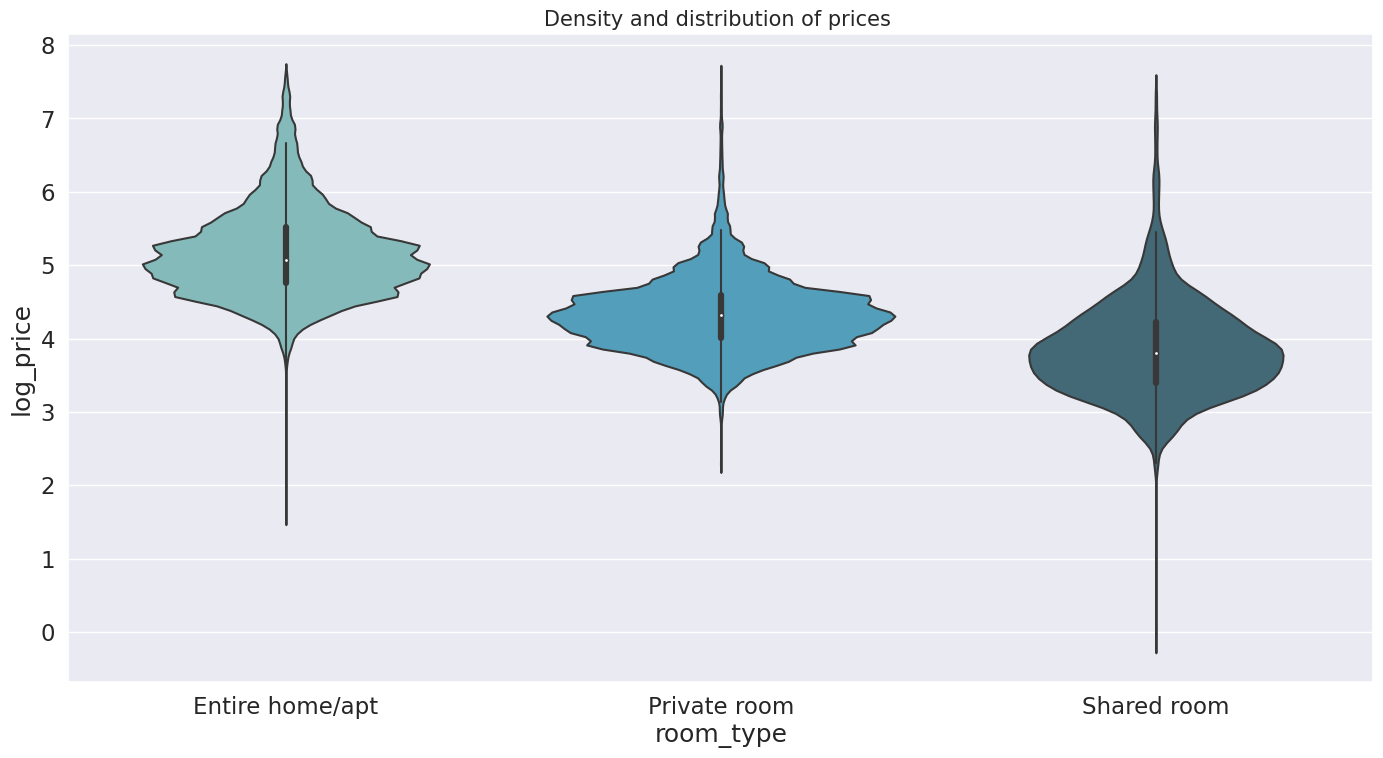

In [137]:
plot_violinplot("room_type","log_price")

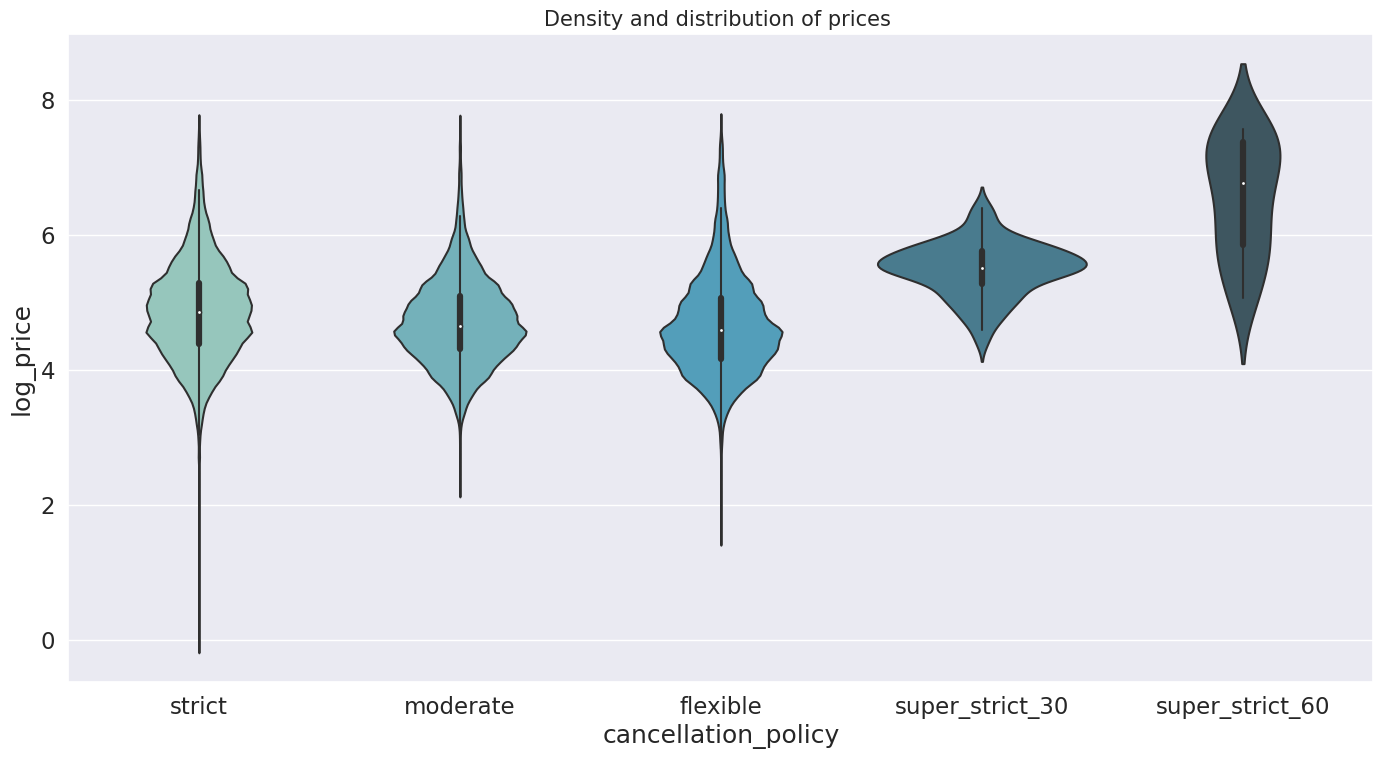

In [138]:
plot_violinplot("cancellation_policy","log_price")

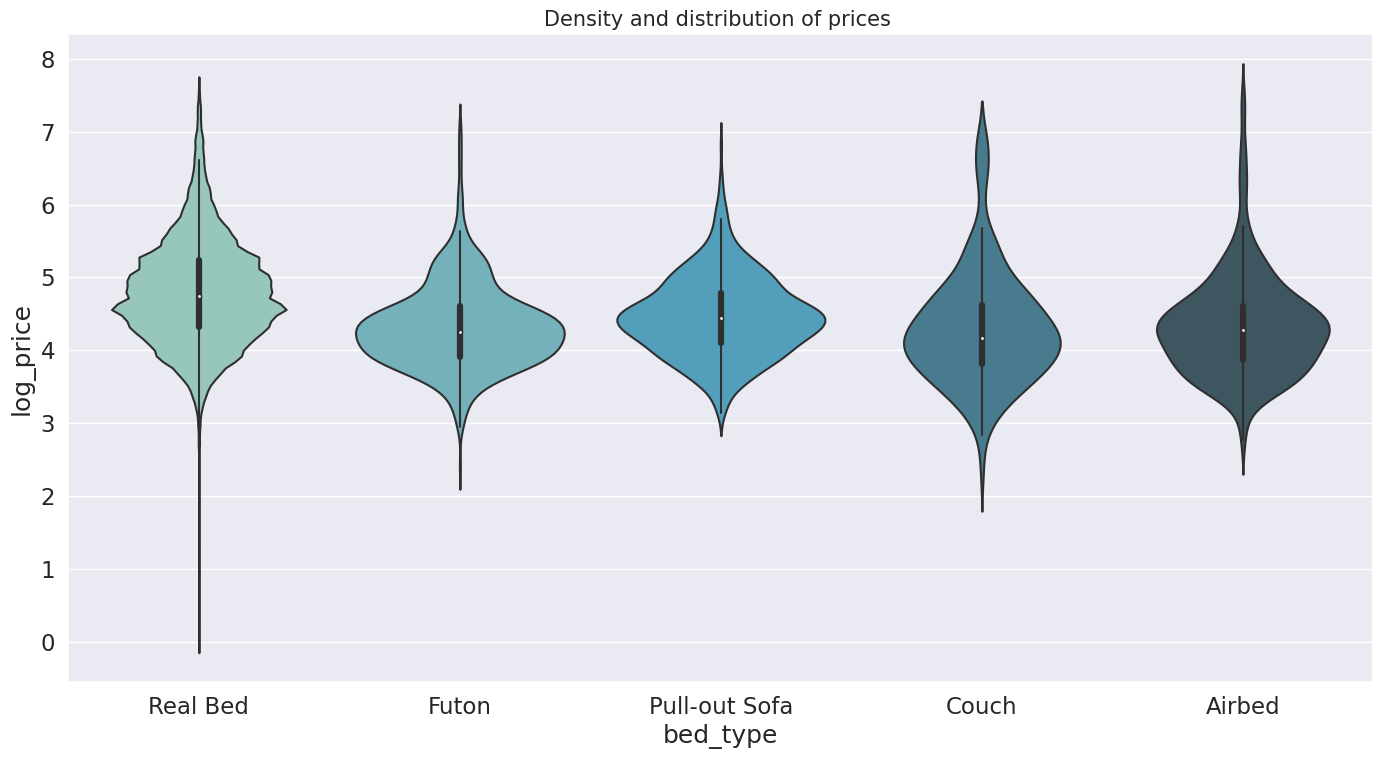

In [139]:
plot_violinplot("bed_type","log_price")

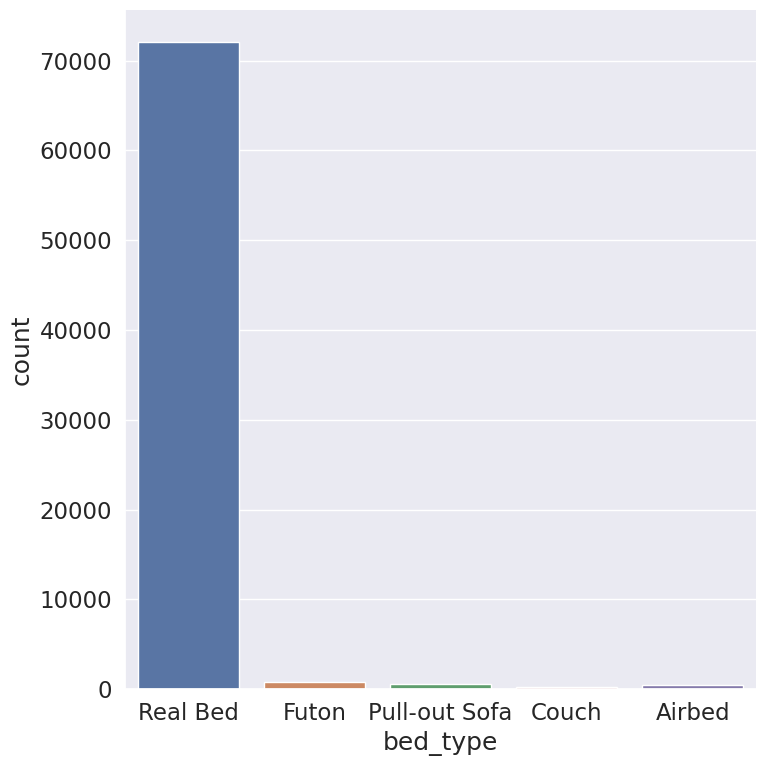

In [140]:
plot_catplot("bed_type","count",8)

### Analyzing Amenities column

In [145]:
df.amenities

0        {"Wireless Internet","Air conditioning",Kitche...
1        {"Wireless Internet","Air conditioning",Kitche...
2        {TV,"Cable TV","Wireless Internet","Air condit...
3        {TV,"Cable TV",Internet,"Wireless Internet",Ki...
4        {TV,Internet,"Wireless Internet","Air conditio...
                               ...                        
74106                                                   {}
74107    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
74108    {TV,Internet,"Wireless Internet","Air conditio...
74109    {TV,"Wireless Internet","Air conditioning",Kit...
74110    {TV,Internet,"Wireless Internet",Kitchen,"Free...
Name: amenities, Length: 74111, dtype: object

In [146]:
# We can replce the amenties column by its count of amentities provided in the set

In [147]:
amenities_count = []
for i in df["amenities"]:
    amenities_count.append(len(i))

In [148]:
len(amenities_count)

74111

In [149]:
# Replacing the count values in the amenities feature

In [150]:
df["amenities"] = amenities_count

In [151]:
df.amenities

0        152
1        218
2        311
3        210
4        174
        ... 
74106      2
74107    224
74108    402
74109    189
74110    279
Name: amenities, Length: 74111, dtype: int64

In [152]:
df.amenities.describe()

count    74111.000000
mean       267.897654
std        111.054722
min          2.000000
25%        195.000000
50%        263.000000
75%        329.000000
max       1496.000000
Name: amenities, dtype: float64

In [153]:
categorical_col = []
for column in df.columns:
    if df[column].nunique() <= 50 and df[column].dtypes != "float64" and df[column].dtypes != "int64" and df[column].dtypes != "bool":
        categorical_col.append(column)

In [154]:
categorical_col

['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']

In [155]:
for i in categorical_col:
    print(i," --> ",df[i].dtypes," --> ",df[i].nunique())

property_type  -->  object  -->  35
room_type  -->  object  -->  3
bed_type  -->  object  -->  5
cancellation_policy  -->  object  -->  5
city  -->  object  -->  6


### Handling Categorical Features in the Dataset

In [156]:
print("The categorical features in the dataset are : \n",categorical_col)

The categorical features in the dataset are : 
 ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']


In [157]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

### LabelEncoding Categorical Features

In [158]:
for col in categorical_col:
    df[col] = le.fit_transform(df[col])

In [159]:
for col in categorical_col:
    print("-----------------------")
    print(col)
    print("Unique value count :- ",df[col].nunique())
    print(df[col].describe())

-----------------------
property_type
Unique value count :-  35
count    74111.000000
mean         5.765973
std          8.617349
min          0.000000
25%          0.000000
50%          0.000000
75%         17.000000
max         34.000000
Name: property_type, dtype: float64
-----------------------
room_type
Unique value count :-  3
count    74111.000000
mean         0.471779
std          0.554599
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: room_type, dtype: float64
-----------------------
bed_type
Unique value count :-  5
count    74111.000000
mean         3.935192
std          0.424104
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: bed_type, dtype: float64
-----------------------
cancellation_policy
Unique value count :-  5
count    74111.000000
mean         1.136336
std          0.854733
min          0.000000
25%          0.000000
50%          

In [ ]:
df.dtypes

### Converting bool columns to int

In [160]:
df["cleaning_fee"] = df["cleaning_fee"].astype("int")
df["host_has_profile_pic"] = df["host_has_profile_pic"].astype("int")
df["host_identity_verified"] = df["host_identity_verified"].astype("int")

### Distribution of all the features

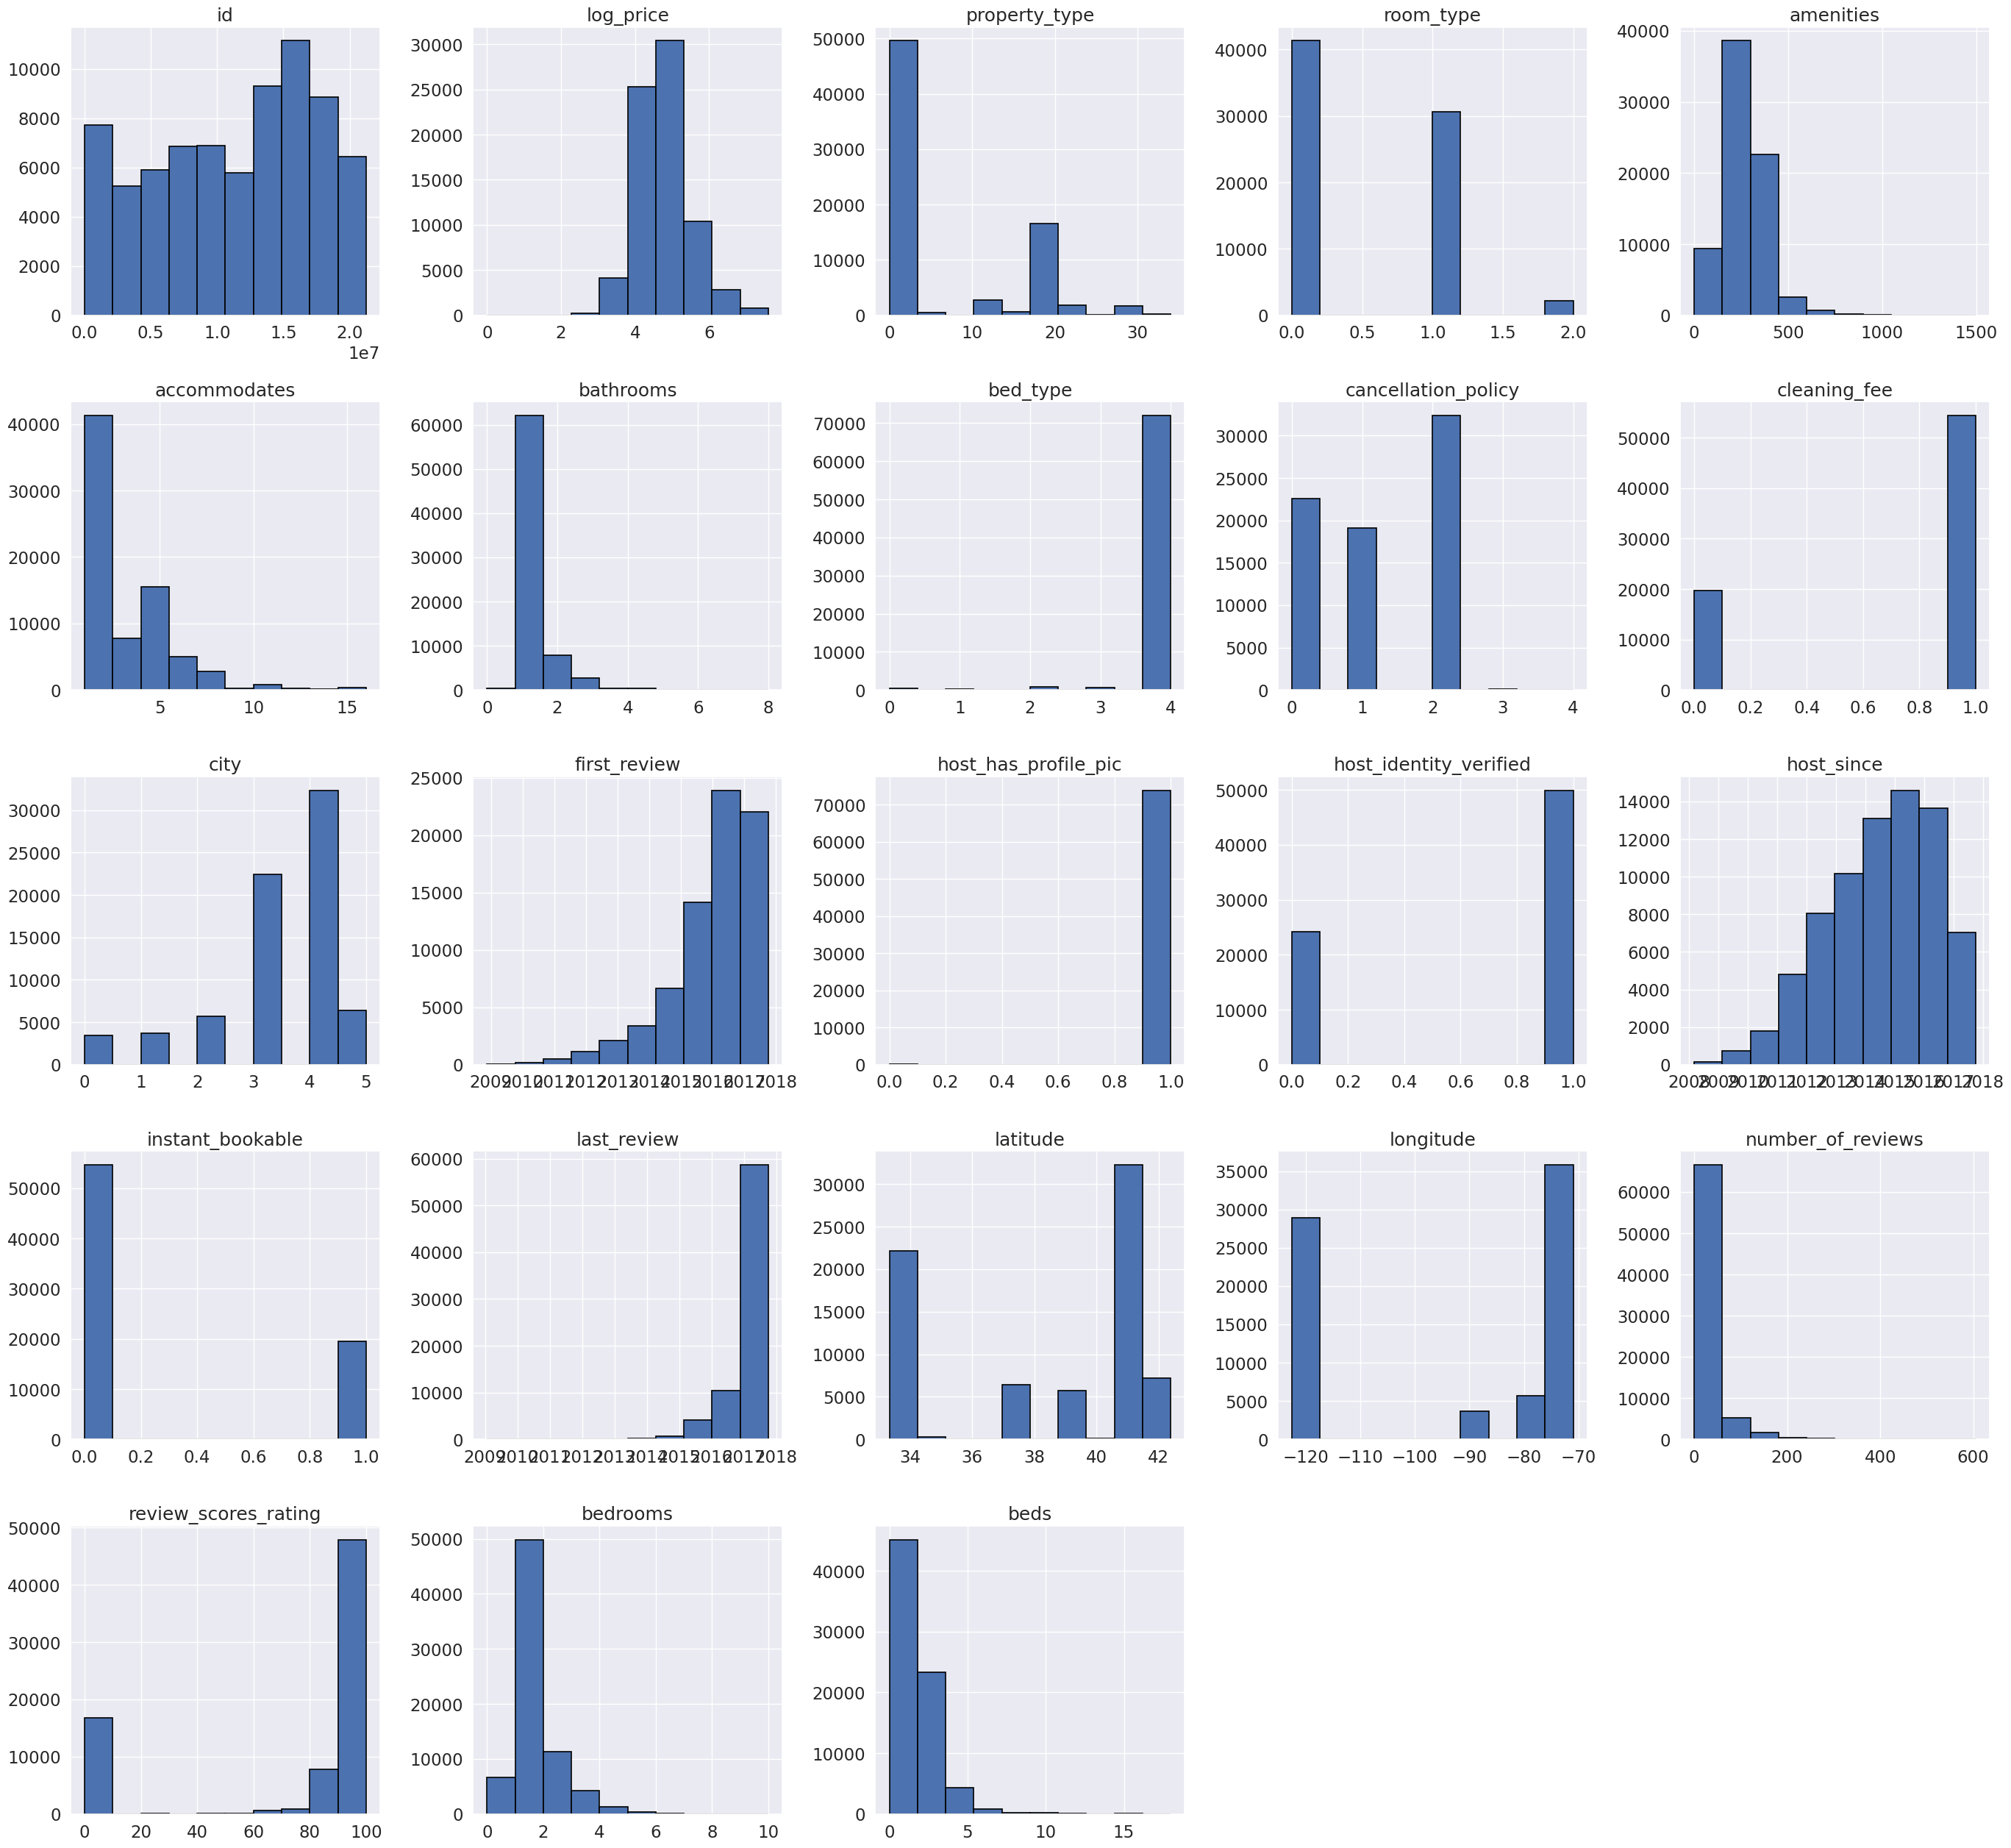

In [161]:
df.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));

### Correlation Matrix

In [162]:
df.corr()

/tmp/ipykernel_46284/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


id  log_price  property_type  room_type  \
id                      1.000000  -0.007178       0.002945   0.005796   
log_price              -0.007178   1.000000       0.048741  -0.607125   
property_type           0.002945   0.048741       1.000000   0.078672   
room_type               0.005796  -0.607125       0.078672   1.000000   
amenities              -0.001295   0.100078       0.119804  -0.090244   
accommodates           -0.005759   0.567574       0.174718  -0.458175   
bathrooms              -0.004058   0.355174       0.258095  -0.116256   
bed_type               -0.003818   0.093780       0.012808  -0.149218   
cancellation_policy    -0.003019   0.131869       0.023837  -0.174317   
cleaning_fee           -0.003059   0.111191       0.035556  -0.213340   
city                    0.003324   0.030913      -0.101186   0.058806   
host_has_profile_pic   -0.001765  -0.013171       0.004490  -0.000608   
host_identity_verified -0.002473   0.024014       0.016414  -0.069528   
instant_bookable        0.002497  -0.044271       0.022528   0.027729   
latitude               -0.003021  -0.002193      -0.301968   0.022201   
longitude              -0.001379  -0.047529      -0.288627   0.030317   
number_of_reviews       0.002945  -0.032470       0.041011  -0.030333   
review_scores_rating   -0.004314  -0.070596       0.018497  -0.078905   
bedrooms               -0.007578   0.473028       0.222567  -0.243132   
beds                   -0.008567   0.441619       0.181175  -0.316631   

                        amenities  accommodates  bathrooms  bed_type  \
id                      -0.001295     -0.005759  -0.004058 -0.003818   
log_price                0.100078      0.567574   0.355174  0.093780   
property_type            0.119804      0.174718   0.258095  0.012808   
room_type               -0.090244     -0.458175  -0.116256 -0.149218   
amenities                1.000000      0.187515   0.121191  0.023528   
accommodates             0.187515      1.000000   0.505490  0.074654   
bathrooms                0.121191      0.505490   1.000000  0.038768   
bed_type                 0.023528      0.074654   0.038768  1.000000   
cancellation_policy      0.215255      0.207242   0.087661  0.038706   
cleaning_fee             0.224424      0.182306   0.054134  0.032604   
city                    -0.097849     -0.102428  -0.076428  0.005397   
host_has_profile_pic     0.018677     -0.003970  -0.003146 -0.001527   
host_identity_verified   0.137626      0.057689   0.014288  0.009383   
instant_bookable         0.096327      0.053093   0.001912  0.027594   
latitude                -0.036155     -0.078309  -0.137673  0.001551   
longitude               -0.061668     -0.085160  -0.134777  0.002134   
number_of_reviews        0.187562      0.041964  -0.041521  0.006444   
review_scores_rating     0.229475      0.050873  -0.025847  0.012147   
bedrooms                 0.128505      0.709214   0.589783  0.054020   
beds                     0.169838      0.809757   0.525384  0.065678   

                        cancellation_policy  cleaning_fee      city  \
id                                -0.003019     -0.003059  0.003324   
log_price                          0.131869      0.111191  0.030913   
property_type                      0.023837      0.035556 -0.101186   
room_type                         -0.174317     -0.213340  0.058806   
amenities                          0.215255      0.224424 -0.097849   
accommodates                       0.207242      0.182306 -0.102428   
bathrooms                          0.087661      0.054134 -0.076428   
bed_type                           0.038706      0.032604  0.005397   
cancellation_policy                1.000000      0.336007 -0.016800   
cleaning_fee                       0.336007      1.000000 -0.019377   
city                              -0.016800     -0.019377  1.000000   
host_has_profile_pic               0.028864      0.022654  0.001270   
host_identity_verified             0.158530      0.162285 -0

### HeatMap of Correlation Matrix

/tmp/ipykernel_46284/4156700933.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


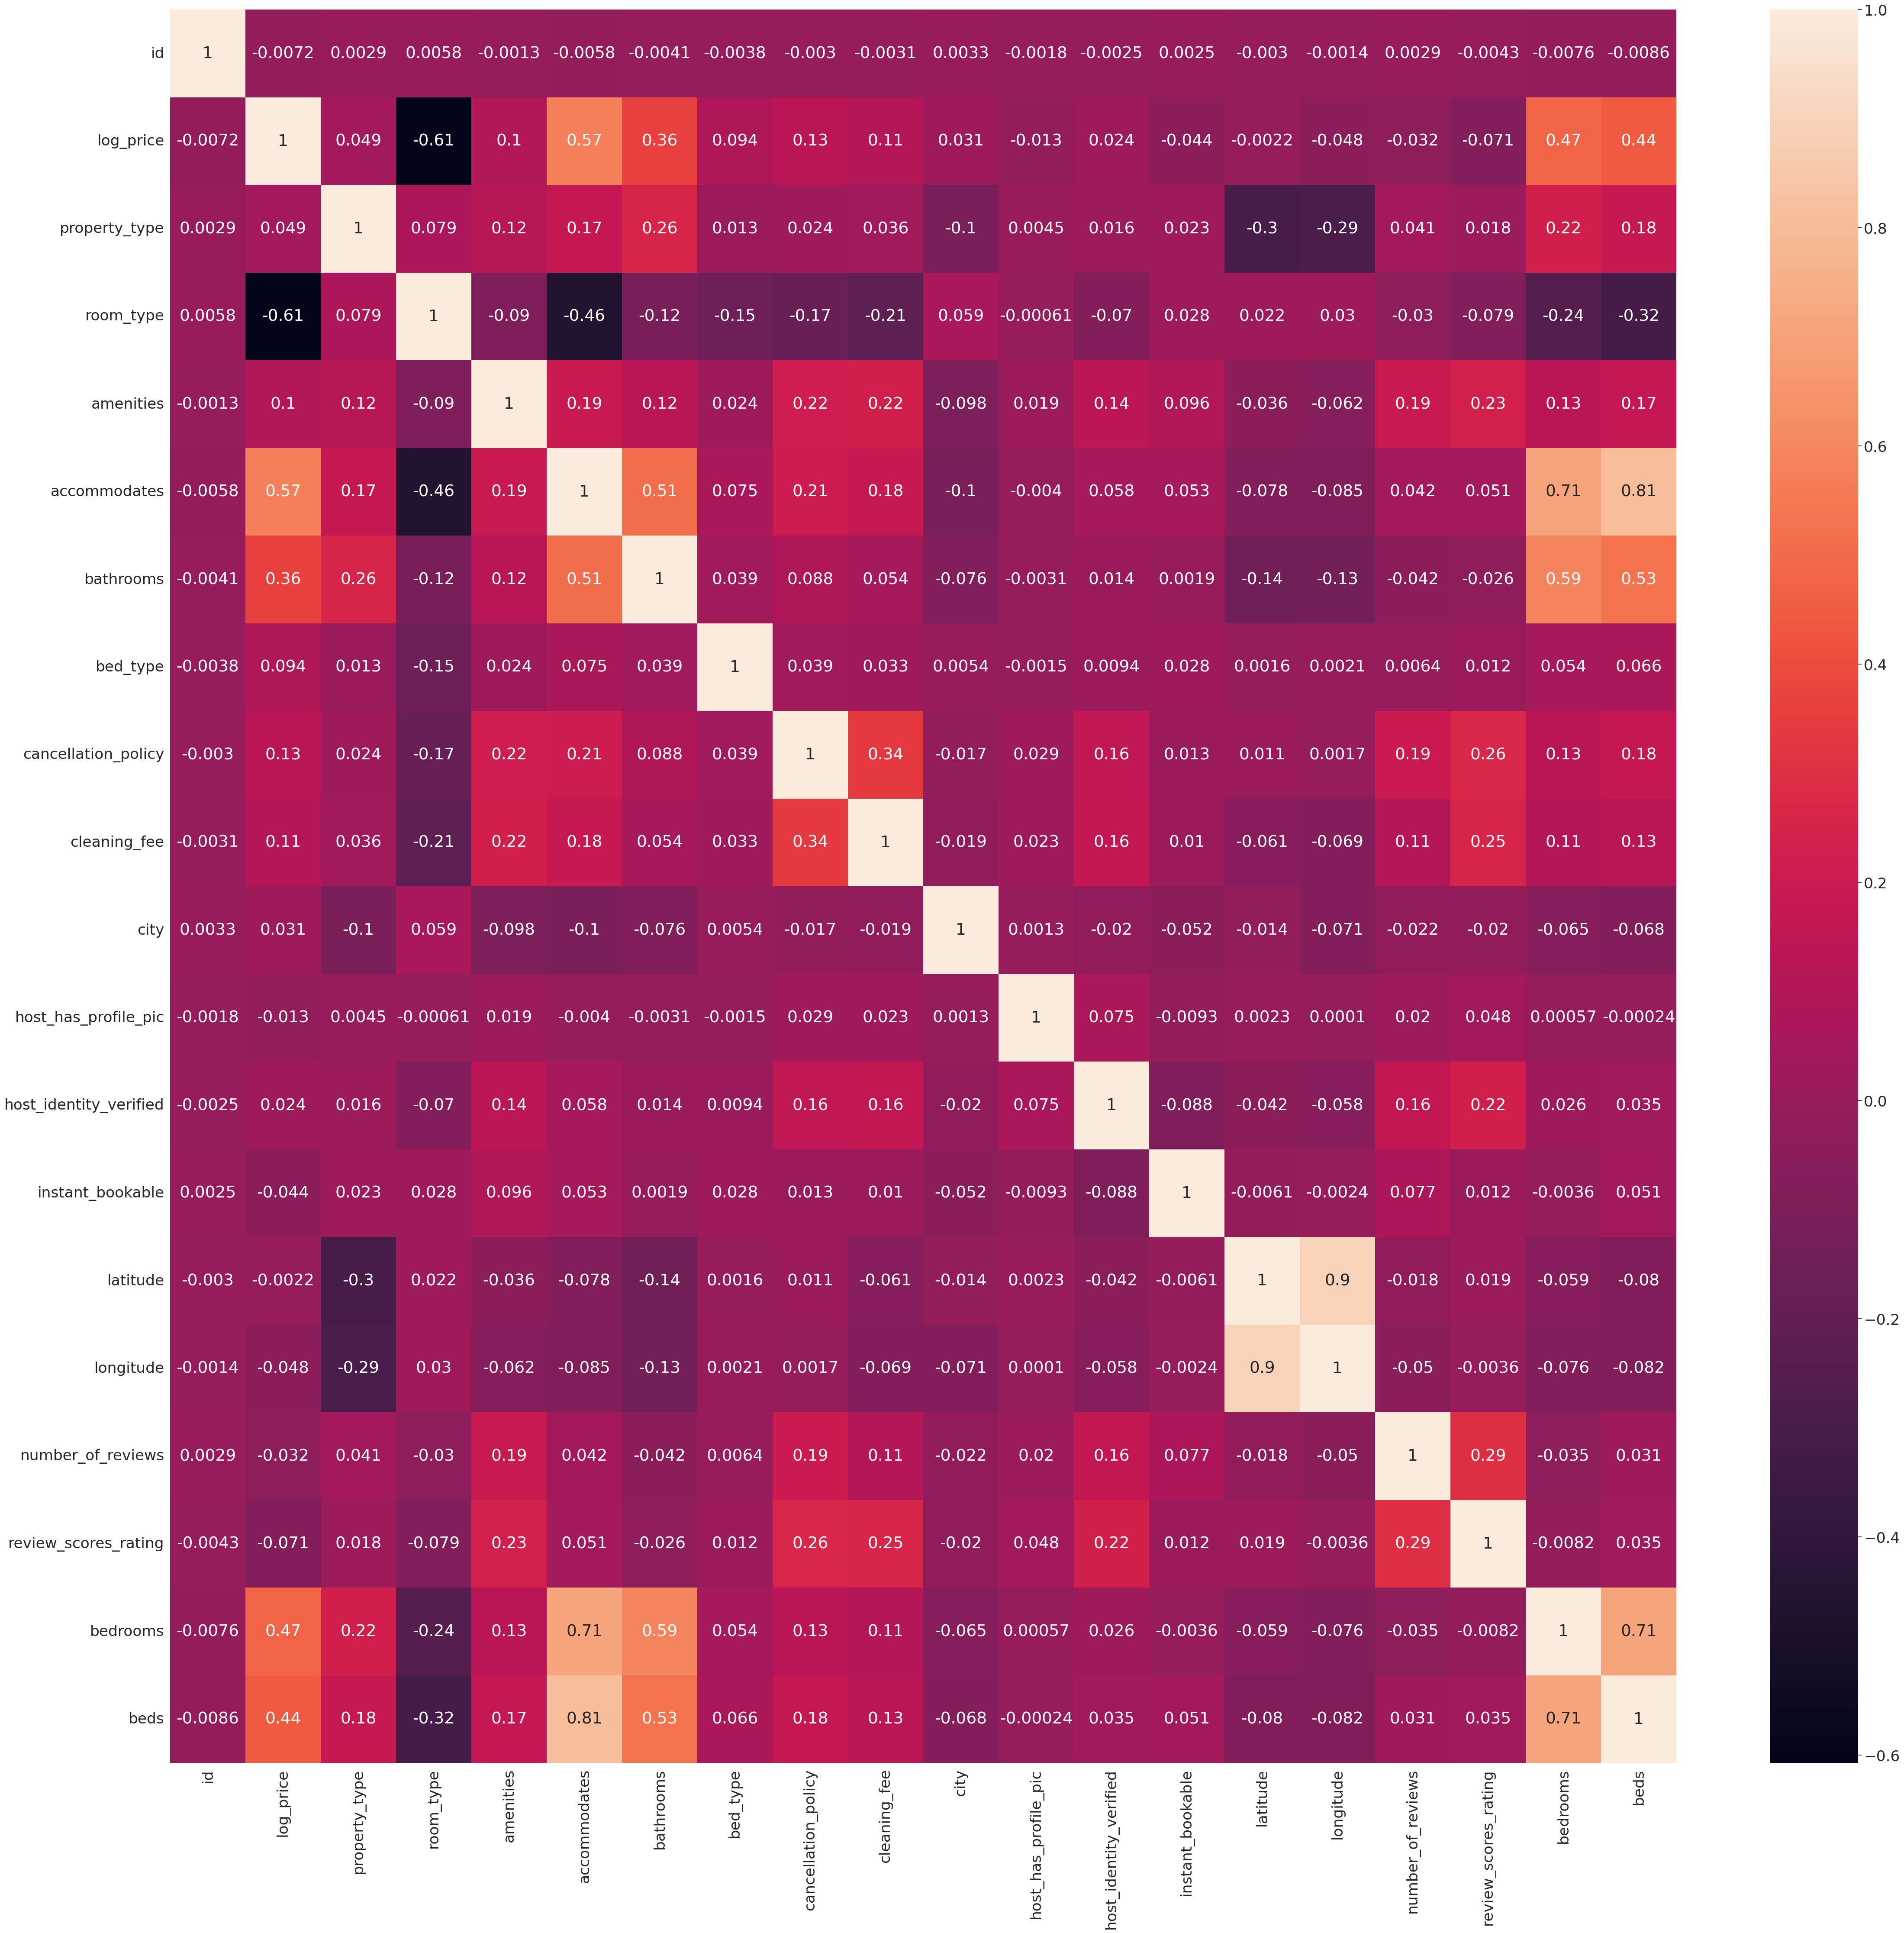

In [163]:
sns.set(font_scale=2.25)
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(), annot=True)

/tmp/ipykernel_46284/3314750232.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[column].sort_values().plot(kind="barh")
/tmp/ipykernel_46284/3314750232.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[column].sort_values().plot(kind="barh")
/tmp/ipykernel_46284/3314750232.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[column].sort_values().plot(kind="barh")
/tmp/ipykernel_46284/3314750232.py:7: FutureWarning: The default value of numer

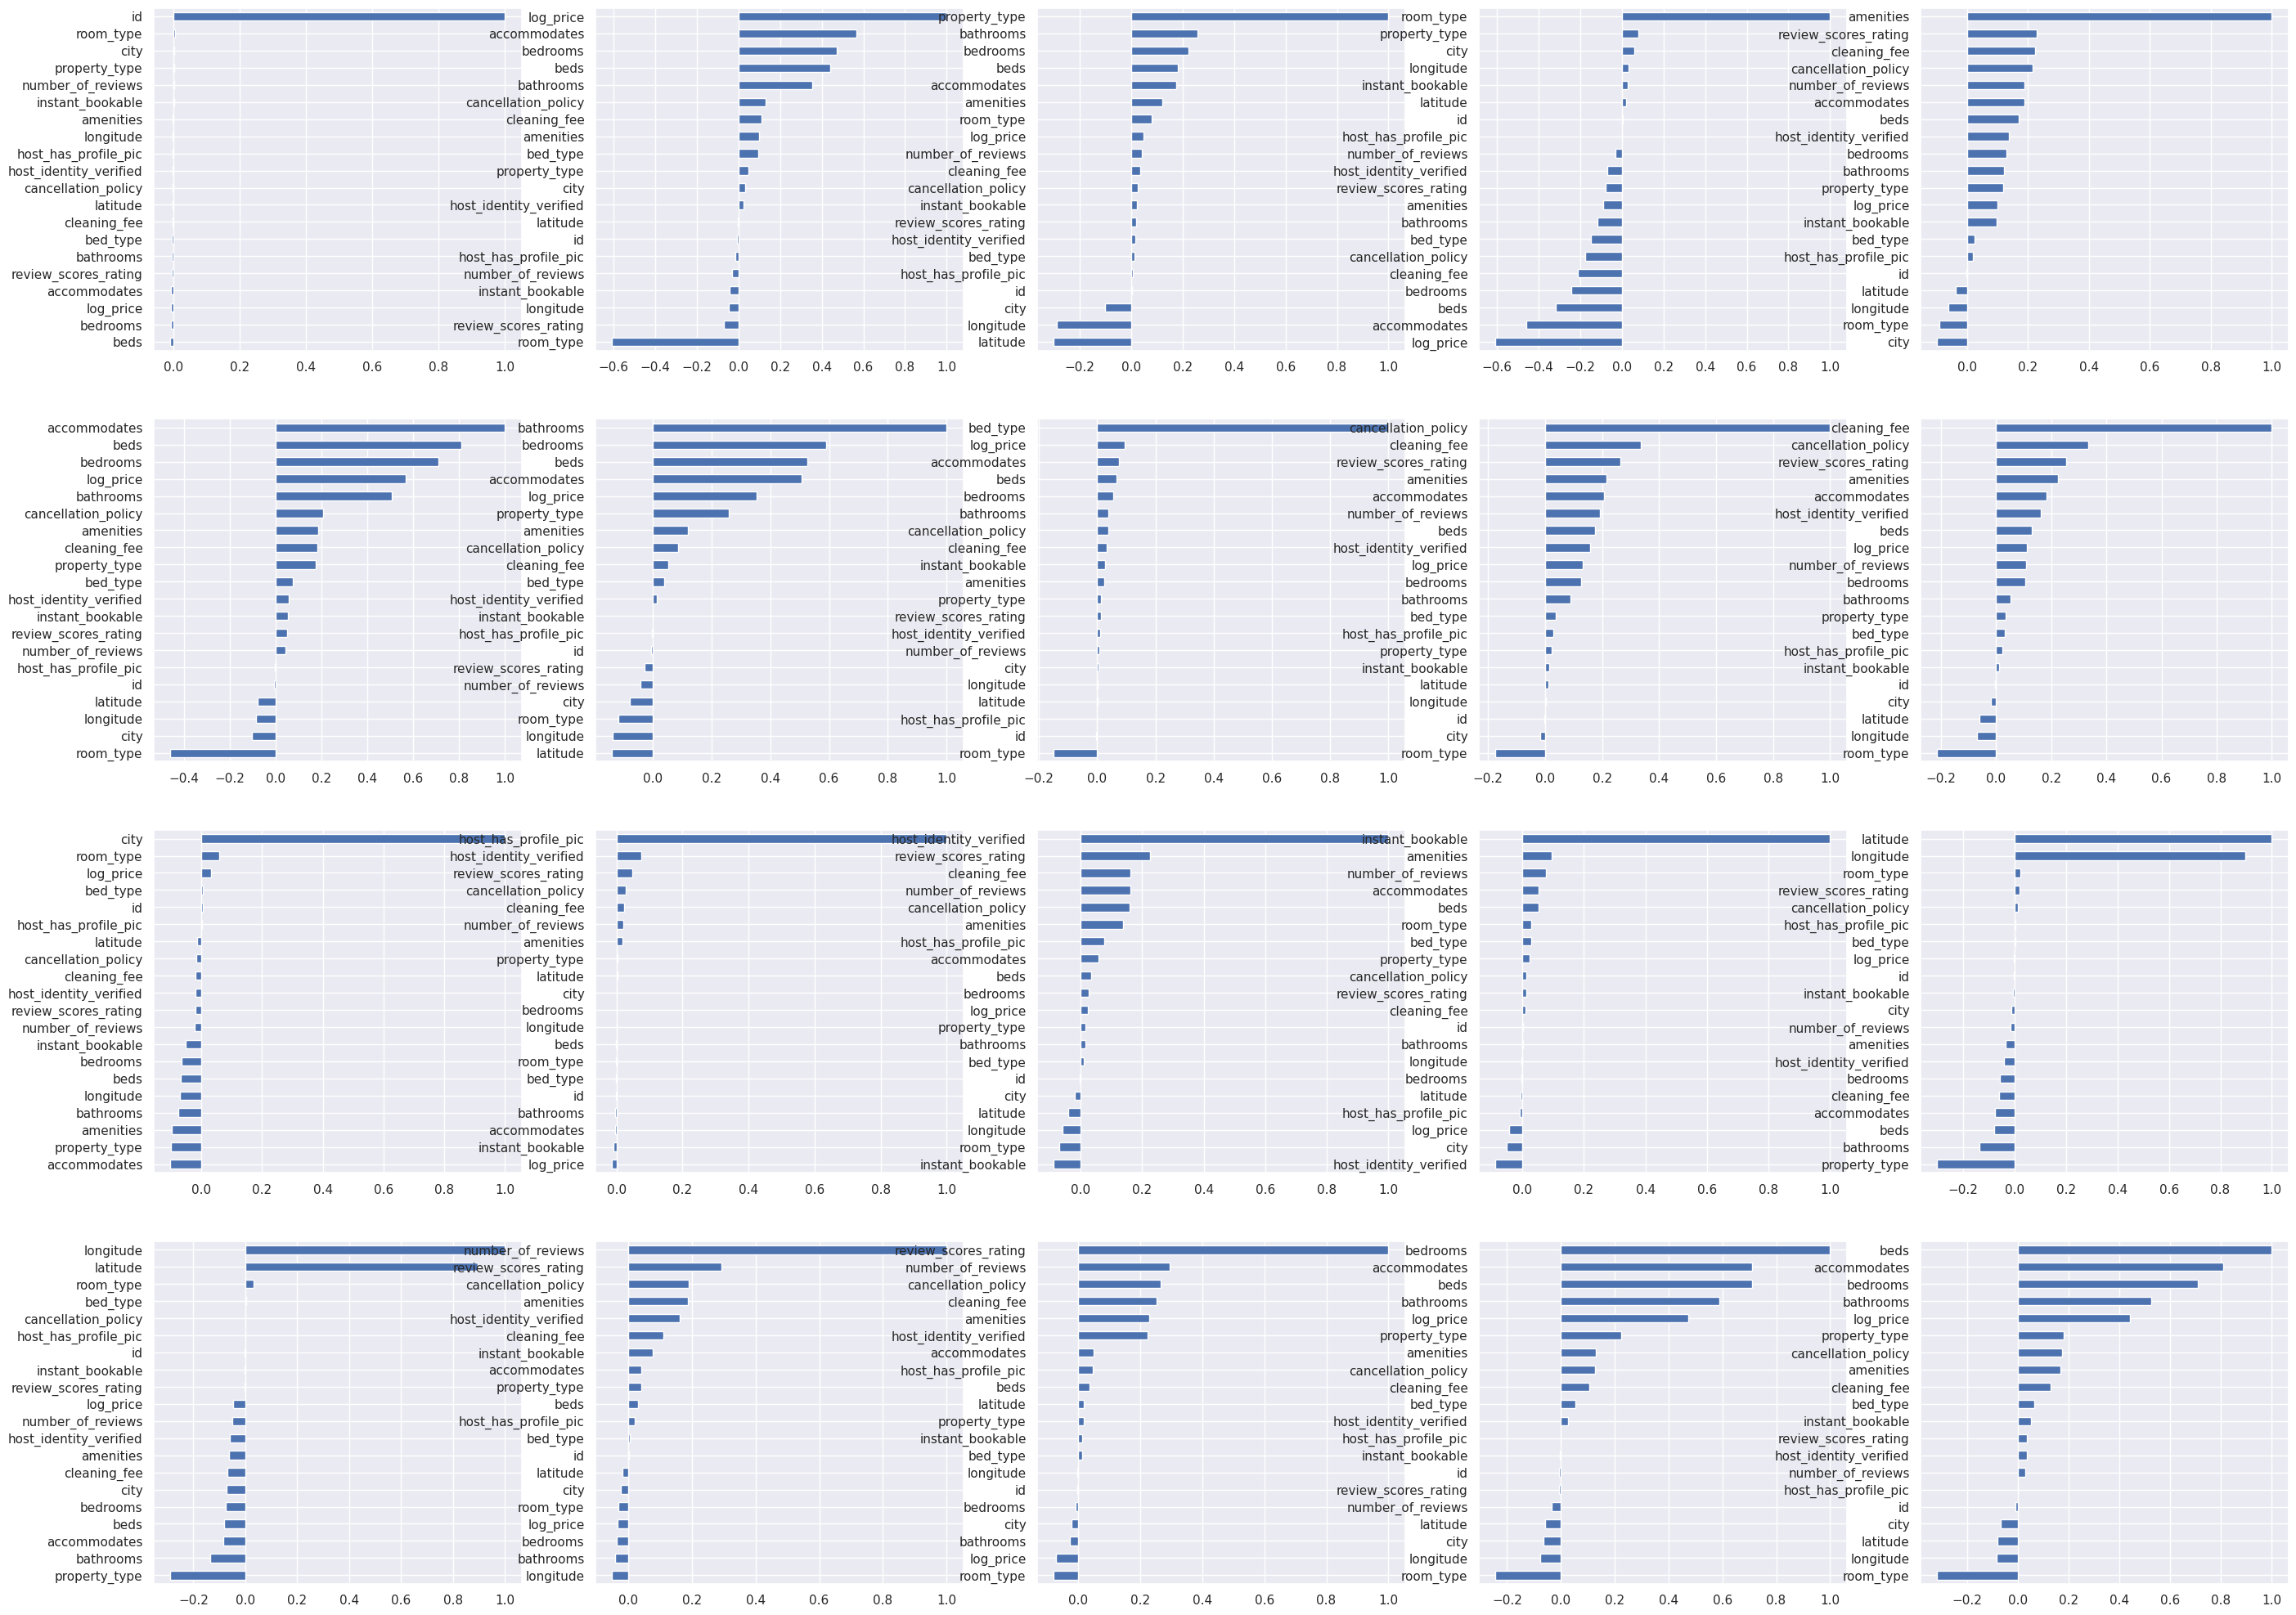

In [164]:
plt.figure(figsize=(30, 30))
sns.set(font_scale=1)
i = 1
for column in df.columns:
    if df[column].dtype == "float64" or df[column].dtype == "int64":
        plt.subplot(5, 5, i)
        df.corr()[column].sort_values().plot(kind="barh")
        i += 1

### Correlation Bar Graph of log_price with other features

/tmp/ipykernel_46284/3935857605.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["log_price"].sort_values().plot(kind="barh")


<AxesSubplot: >

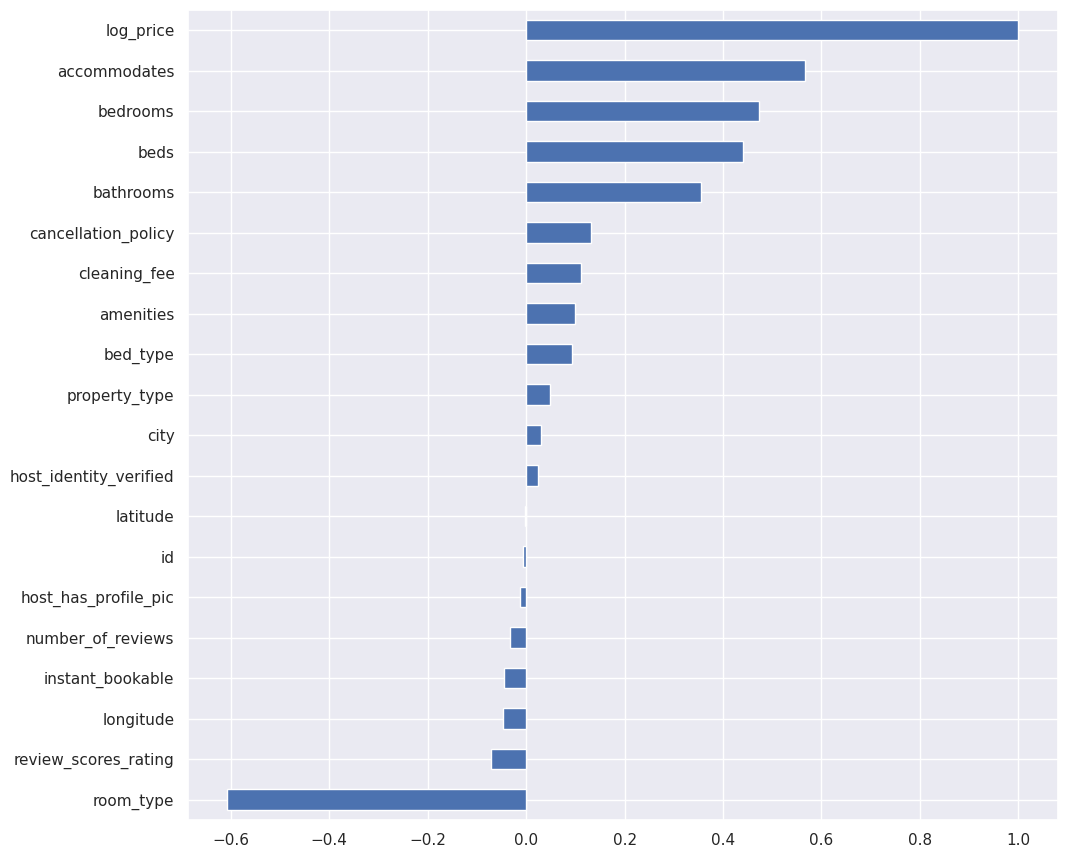

In [165]:
plt.figure(figsize=(10,10))
df.corr()["log_price"].sort_values().plot(kind="barh")

/tmp/ipykernel_46284/1545613493.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["accommodates"].sort_values().plot(kind="barh")


<AxesSubplot: >

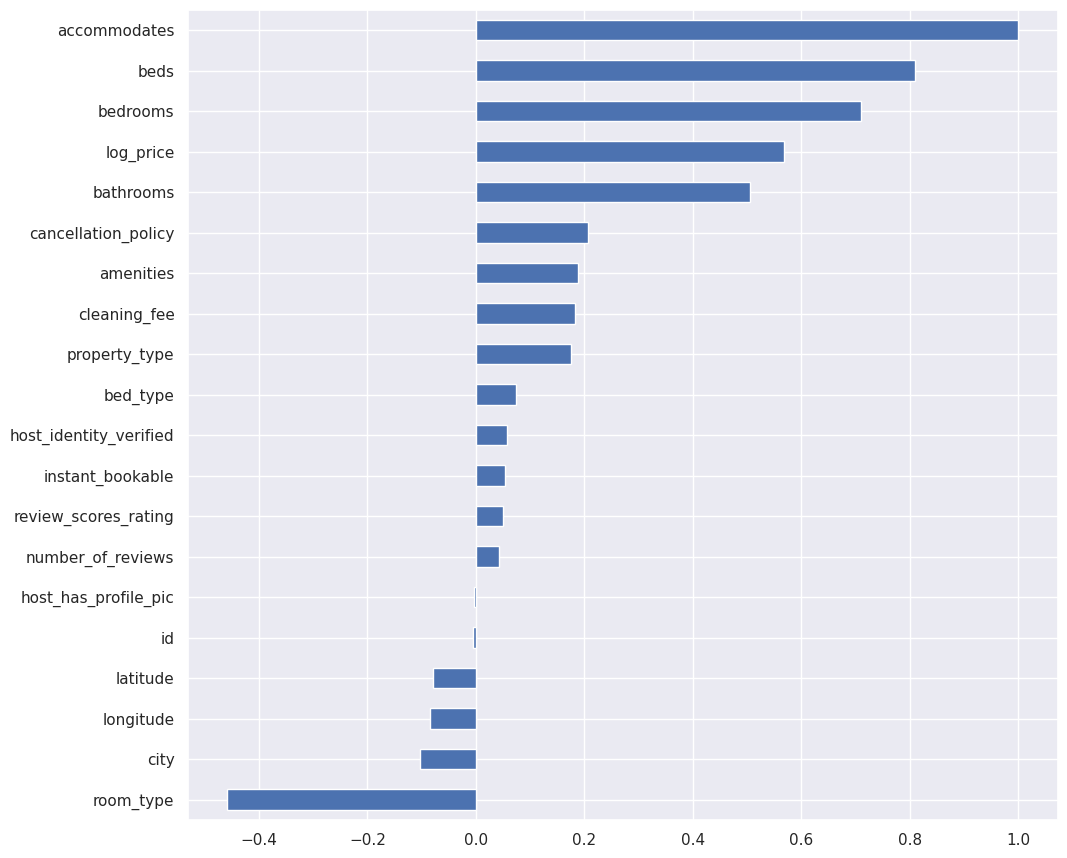

In [166]:
plt.figure(figsize=(10,10))
df.corr()["accommodates"].sort_values().plot(kind="barh")

In [168]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds'],
      dtype='object')

# SAVING PROCESSED DATASET

In [185]:
df_processed_out = df.drop(["id","name","description","first_review","host_since","last_review","neighbourhood"],axis = 1)
save_dir = os.path.dirname(dataset_path)
dataset_out_name = os.path.basename(dataset_path).split('.')[0]
df_processed_out.to_csv(os.path.join(save_dir, dataset_out_name + '_preprocessed.csv'), sep=';', index=False)
